### One specific scenario

{'RecoveryPeriod': {'StartDate': '06/09/24', 'StartTime': '7:00', 'EndDate': '06/09/24', 'EndTime': '20:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
2024-09-06 07:00:00


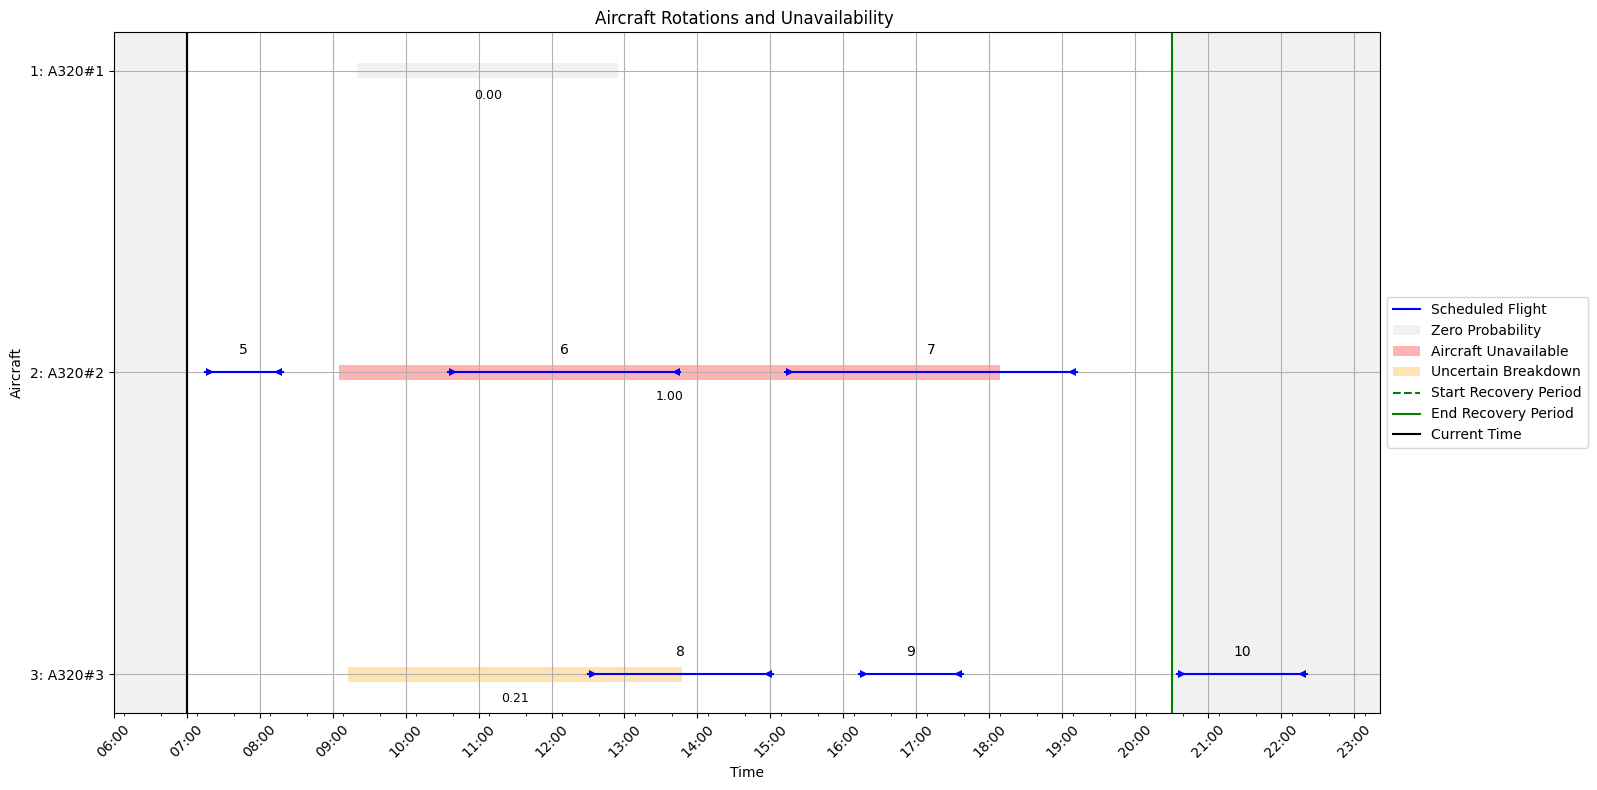

In [1]:
from scripts.visualizations import StatePlotter
from scripts.utils import load_scenario_data
import os
from src.environment import AircraftDisruptionEnv
from datetime import datetime

env_type = 'myopic'

# Set the scenario and root folder
data_root_folder = "../data/Training/3ac-single-cleared/"
scenario_name = 'Scenario_01'

# Verify that the scenario exists
if not os.path.exists(data_root_folder + scenario_name):
    raise FileNotFoundError('The scenario does not exist at ', data_root_folder + scenario_name)

# Run the visualization for the scenario
data_dict = load_scenario_data(data_root_folder + scenario_name)

# Extract necessary data for the environment
aircraft_dict = data_dict['aircraft']
flights_dict = data_dict['flights']
rotations_dict = data_dict['rotations']
alt_aircraft_dict = data_dict['alt_aircraft']
config_dict = data_dict['config']

print(config_dict)

# Initialize the environment
env = AircraftDisruptionEnv(aircraft_dict, flights_dict, rotations_dict, alt_aircraft_dict, config_dict,  env_type=env_type)


# Create StatePlotter object for visualizing the environment state
state_plotter = StatePlotter(
    aircraft_dict=env.aircraft_dict,
    flights_dict=env.flights_dict,
    rotations_dict=env.rotations_dict,
    alt_aircraft_dict=env.alt_aircraft_dict,
    start_datetime=env.start_datetime,
    end_datetime=env.end_datetime,
    uncertain_breakdowns=env.uncertain_breakdowns,
)



# Define the recovery period based on provided configuration
start_date = config_dict['RecoveryPeriod']['StartDate']
start_time = config_dict['RecoveryPeriod']['StartTime']
end_date = config_dict['RecoveryPeriod']['EndDate']
end_time = config_dict['RecoveryPeriod']['EndTime']
start_datetime = datetime.strptime(f"{start_date} {start_time}", '%d/%m/%y %H:%M')

#  def plot_state(self, flights_dict, swapped_flights, environment_delayed_flights, cancelled_flights, current_datetime):
# Create the plotter object
print(env.current_datetime)
state_plotter.plot_state(flights_dict, [], [], set(), env.current_datetime)


### A whole folder (like the training set)

Processing scenario: Scenario_01
{'RecoveryPeriod': {'StartDate': '24/09/24', 'StartTime': '5:00', 'EndDate': '24/09/24', 'EndTime': '20:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_01


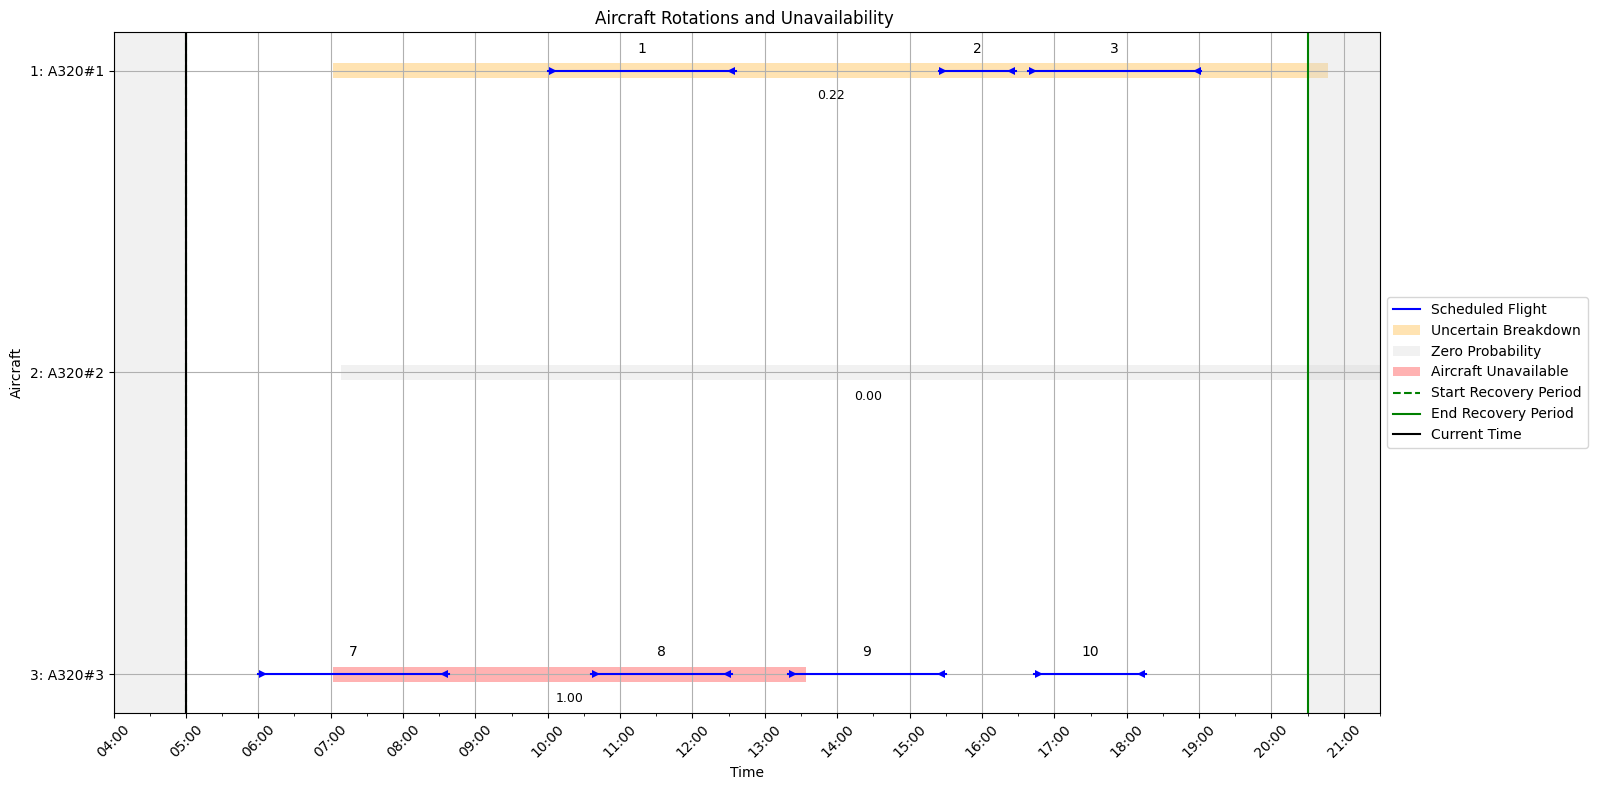

Processing scenario: Scenario_02
{'RecoveryPeriod': {'StartDate': '25/09/24', 'StartTime': '5:00', 'EndDate': '25/09/24', 'EndTime': '22:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_02


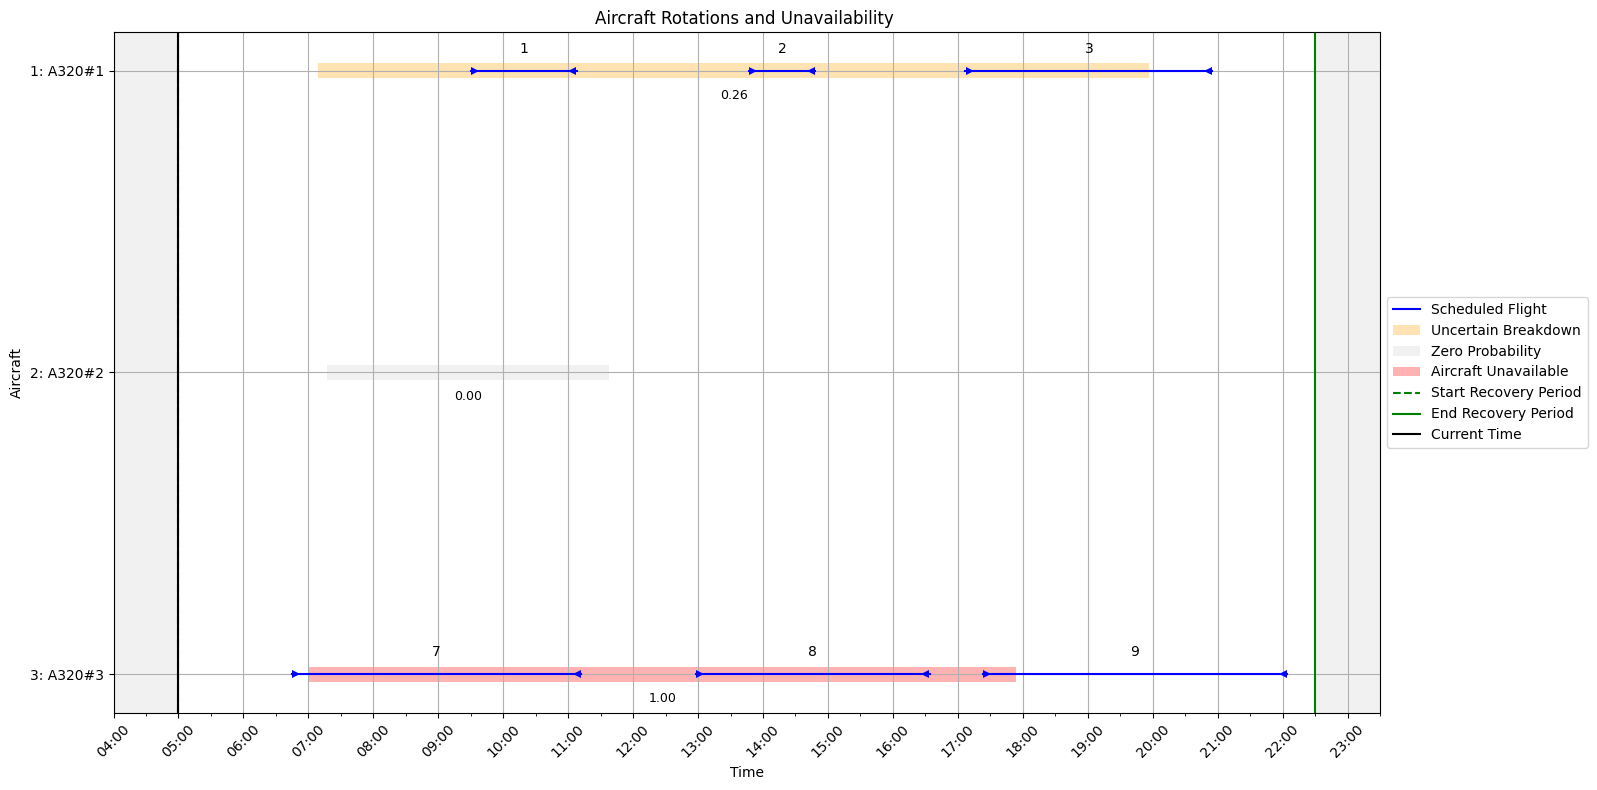

Processing scenario: Scenario_03
{'RecoveryPeriod': {'StartDate': '18/09/24', 'StartTime': '7:00', 'EndDate': '18/09/24', 'EndTime': '23:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_03


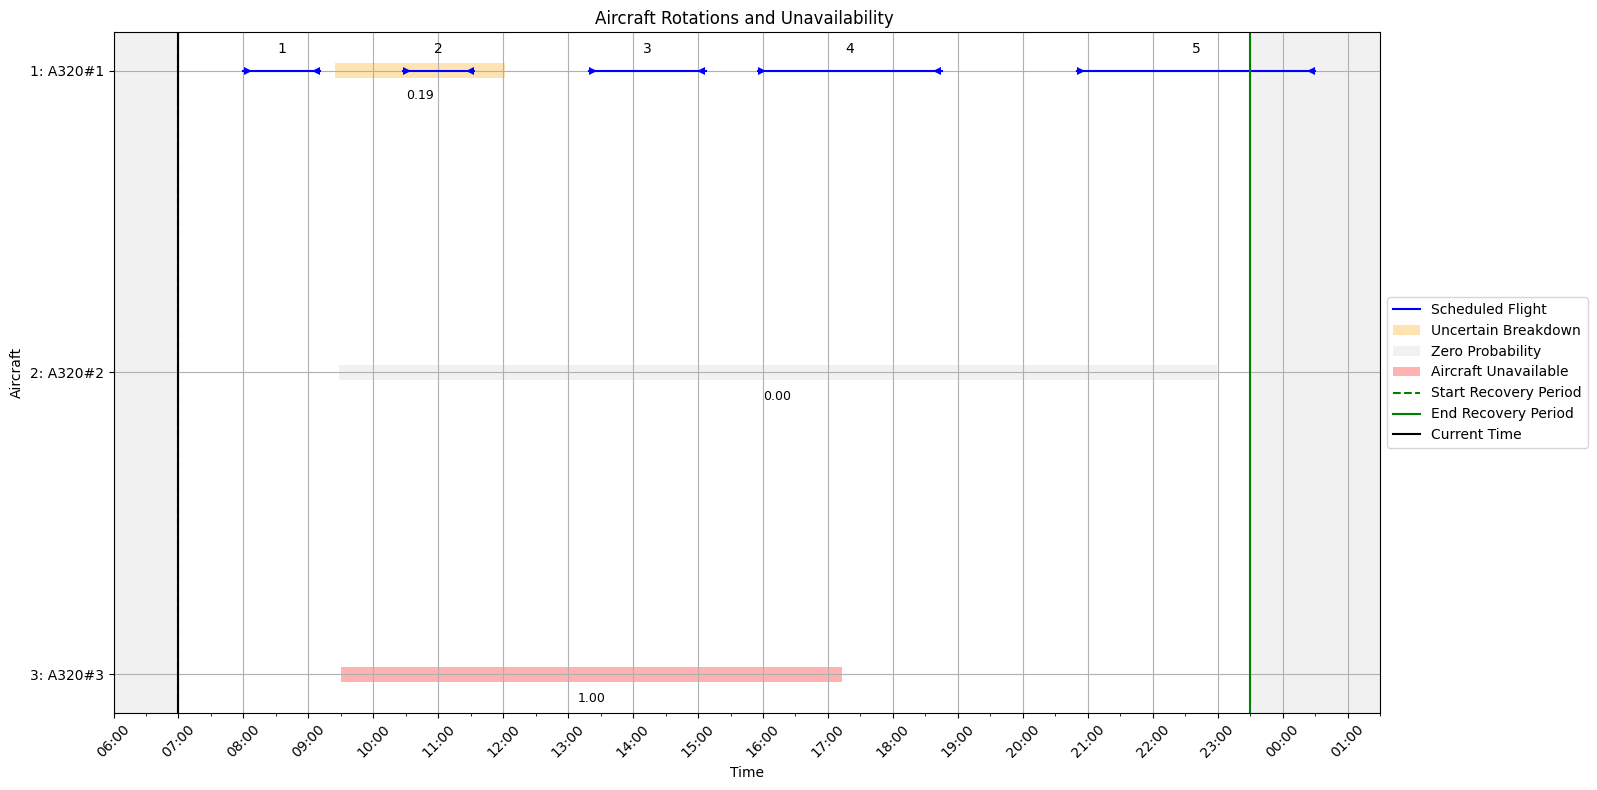

Processing scenario: Scenario_04
{'RecoveryPeriod': {'StartDate': '25/09/24', 'StartTime': '6:00', 'EndDate': '25/09/24', 'EndTime': '21:00'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_04


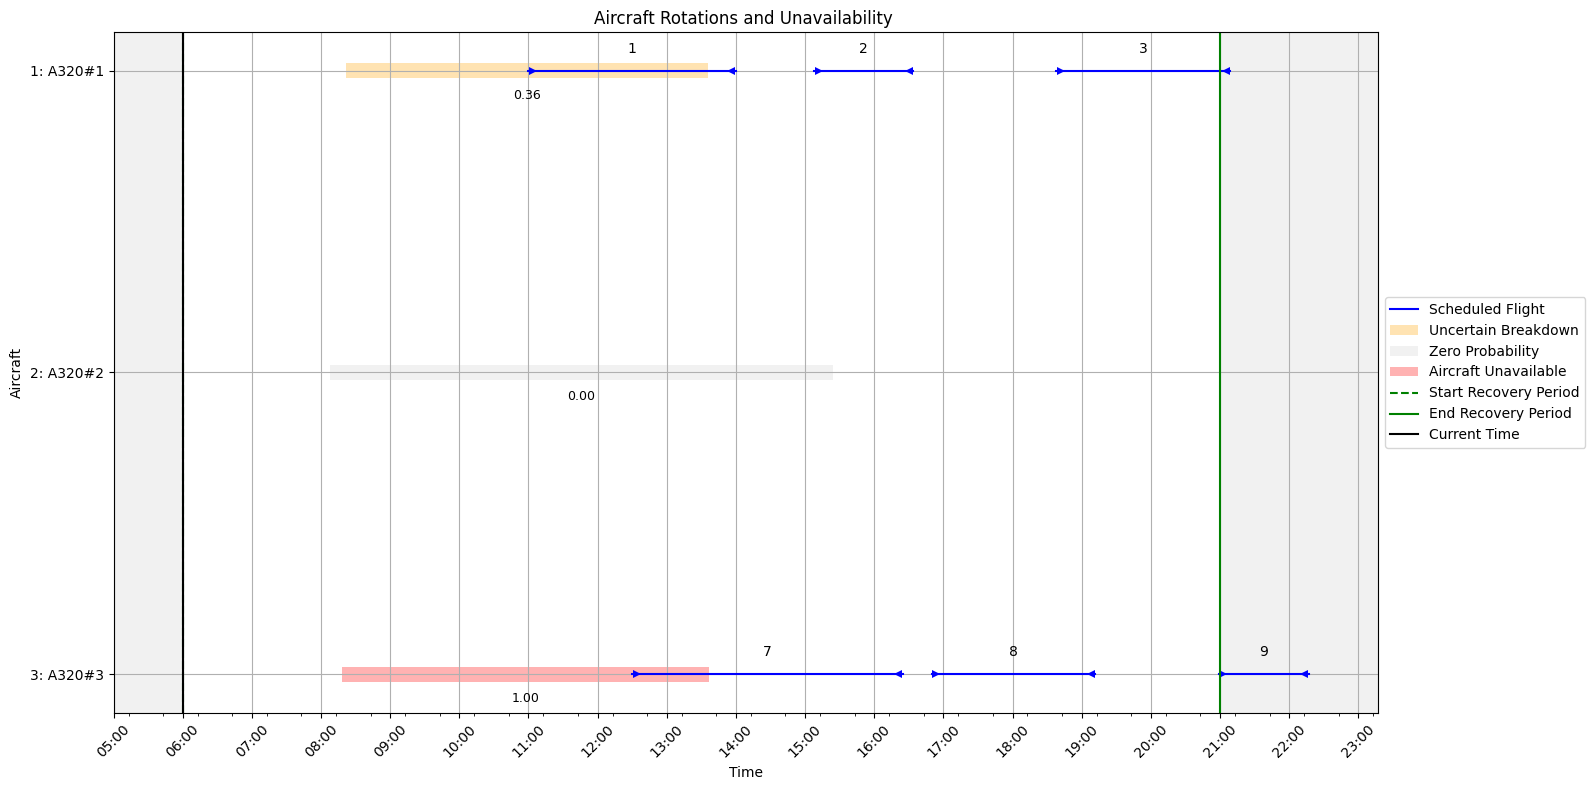

Processing scenario: Scenario_05
{'RecoveryPeriod': {'StartDate': '22/09/24', 'StartTime': '5:00', 'EndDate': '22/09/24', 'EndTime': '22:00'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_05


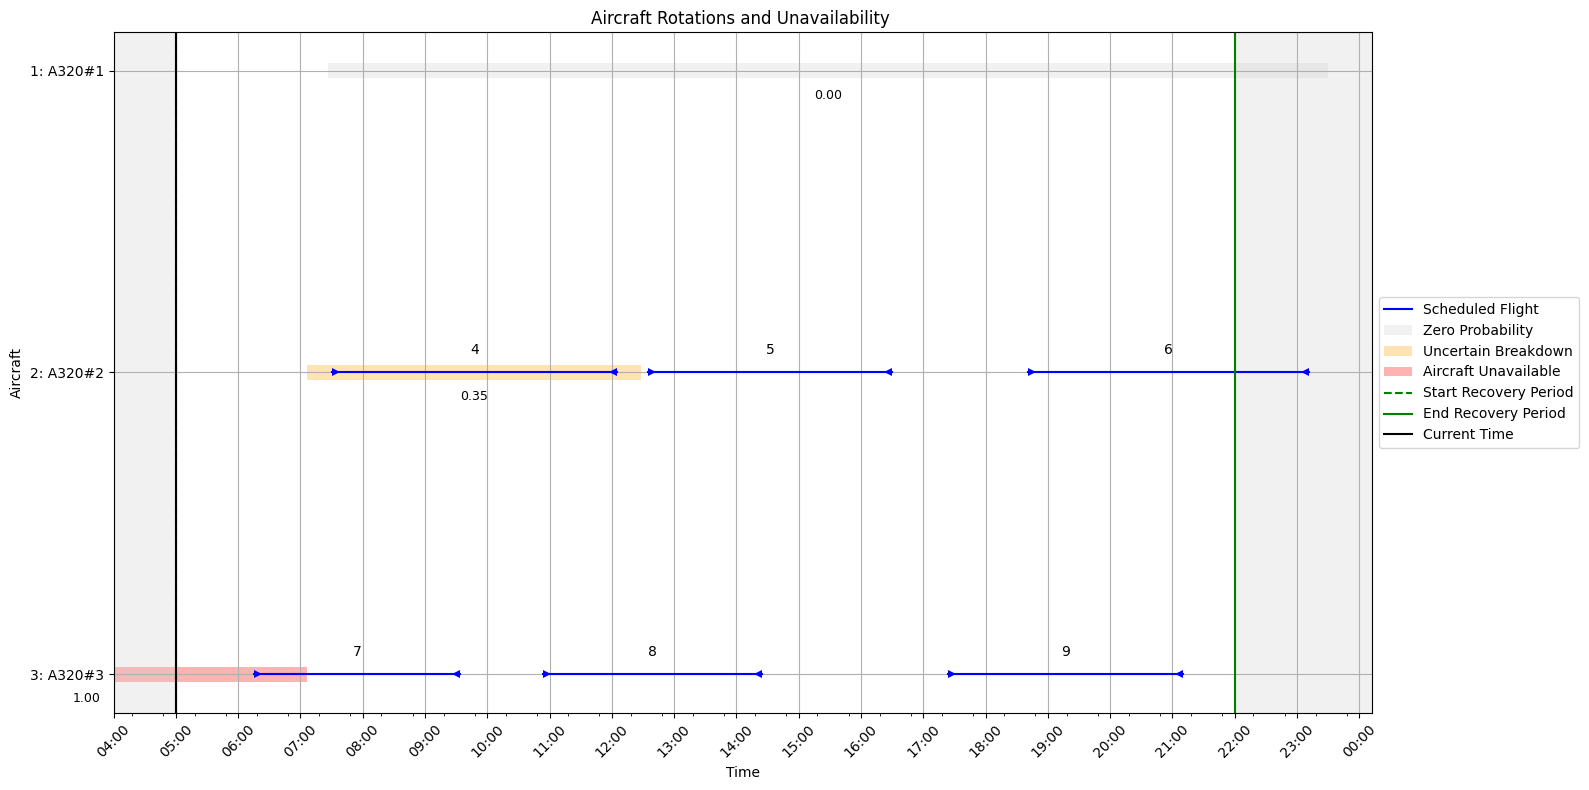

Processing scenario: Scenario_06
{'RecoveryPeriod': {'StartDate': '03/09/24', 'StartTime': '7:00', 'EndDate': '03/09/24', 'EndTime': '23:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_06


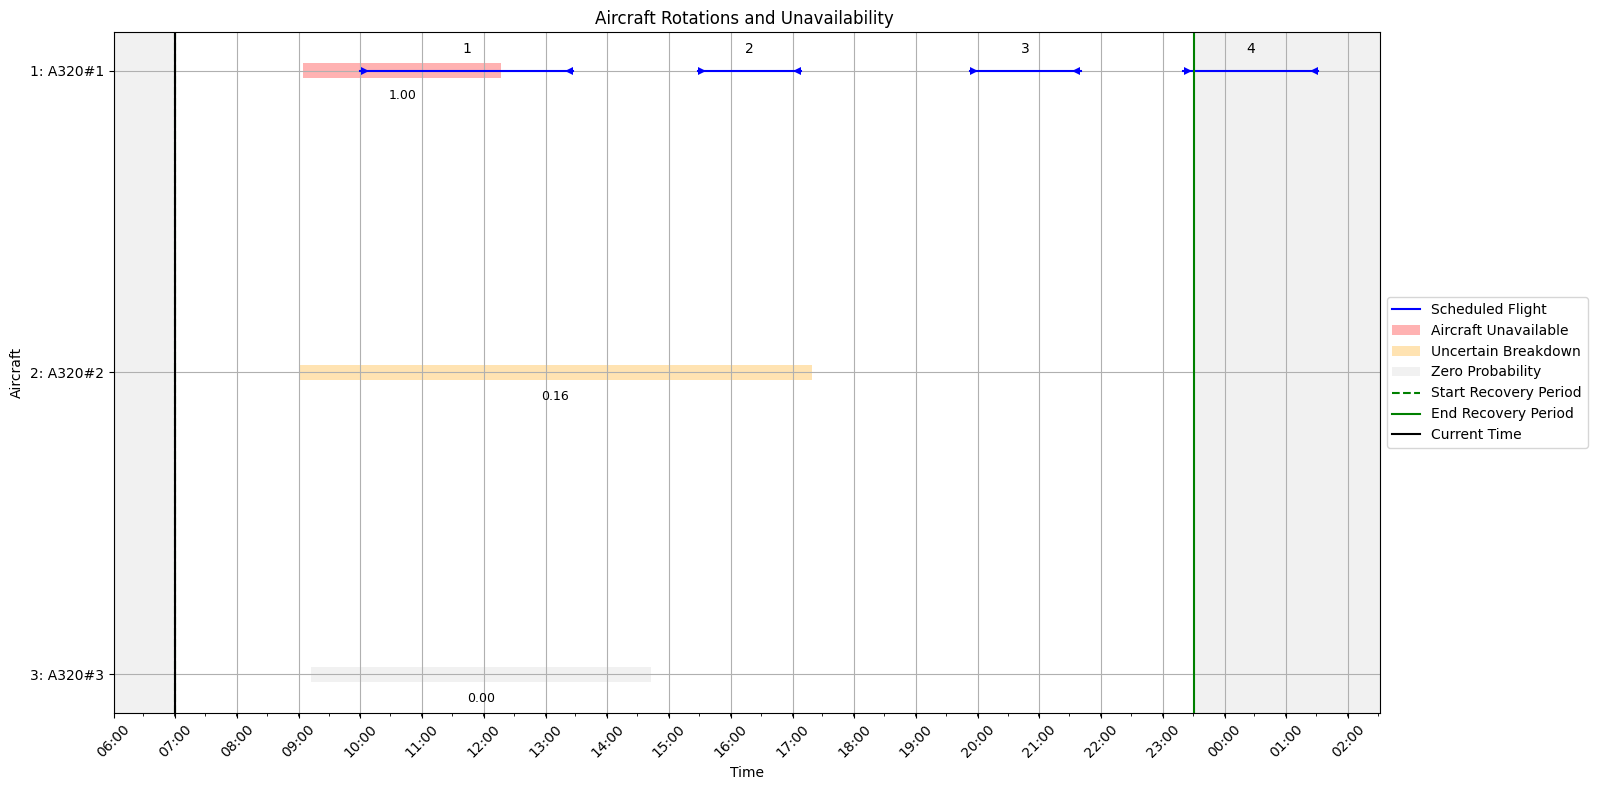

Processing scenario: Scenario_07
{'RecoveryPeriod': {'StartDate': '02/09/24', 'StartTime': '5:00', 'EndDate': '02/09/24', 'EndTime': '23:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_07


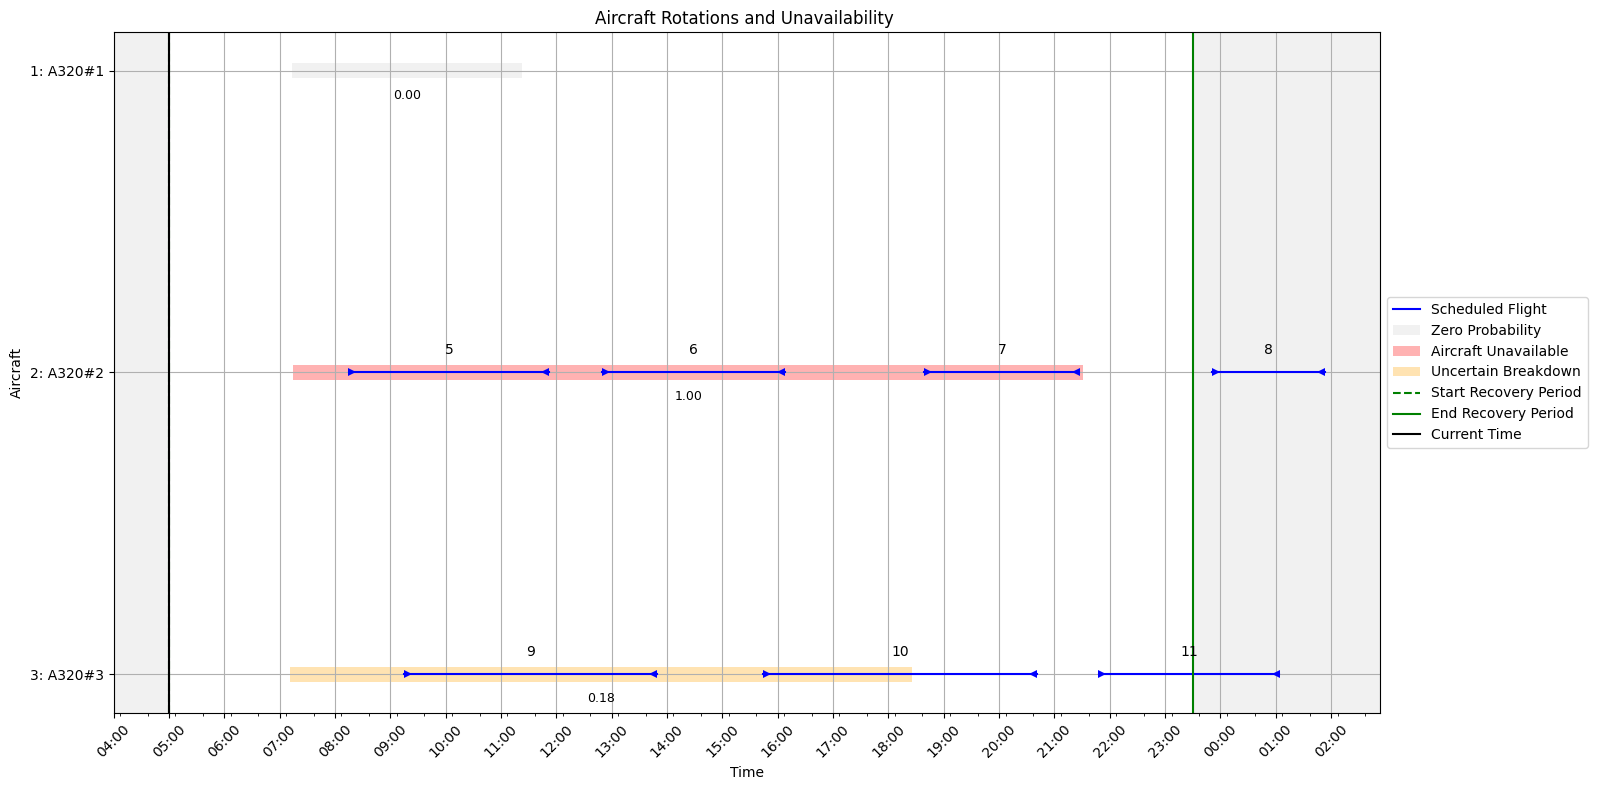

Processing scenario: Scenario_08
{'RecoveryPeriod': {'StartDate': '04/09/24', 'StartTime': '5:00', 'EndDate': '04/09/24', 'EndTime': '22:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_08


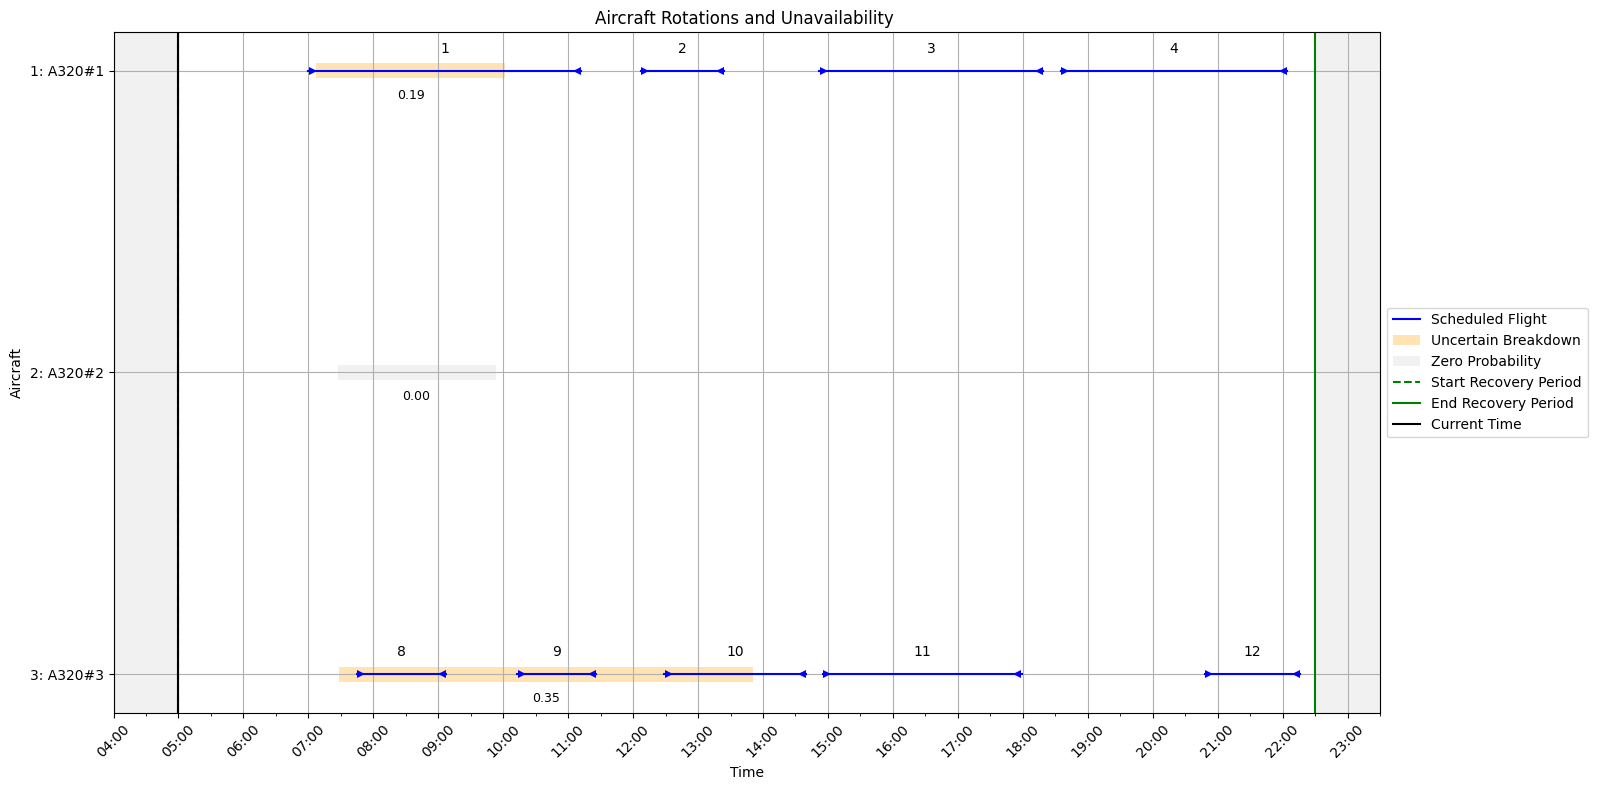

Processing scenario: Scenario_09
{'RecoveryPeriod': {'StartDate': '03/09/24', 'StartTime': '7:00', 'EndDate': '03/09/24', 'EndTime': '22:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_09


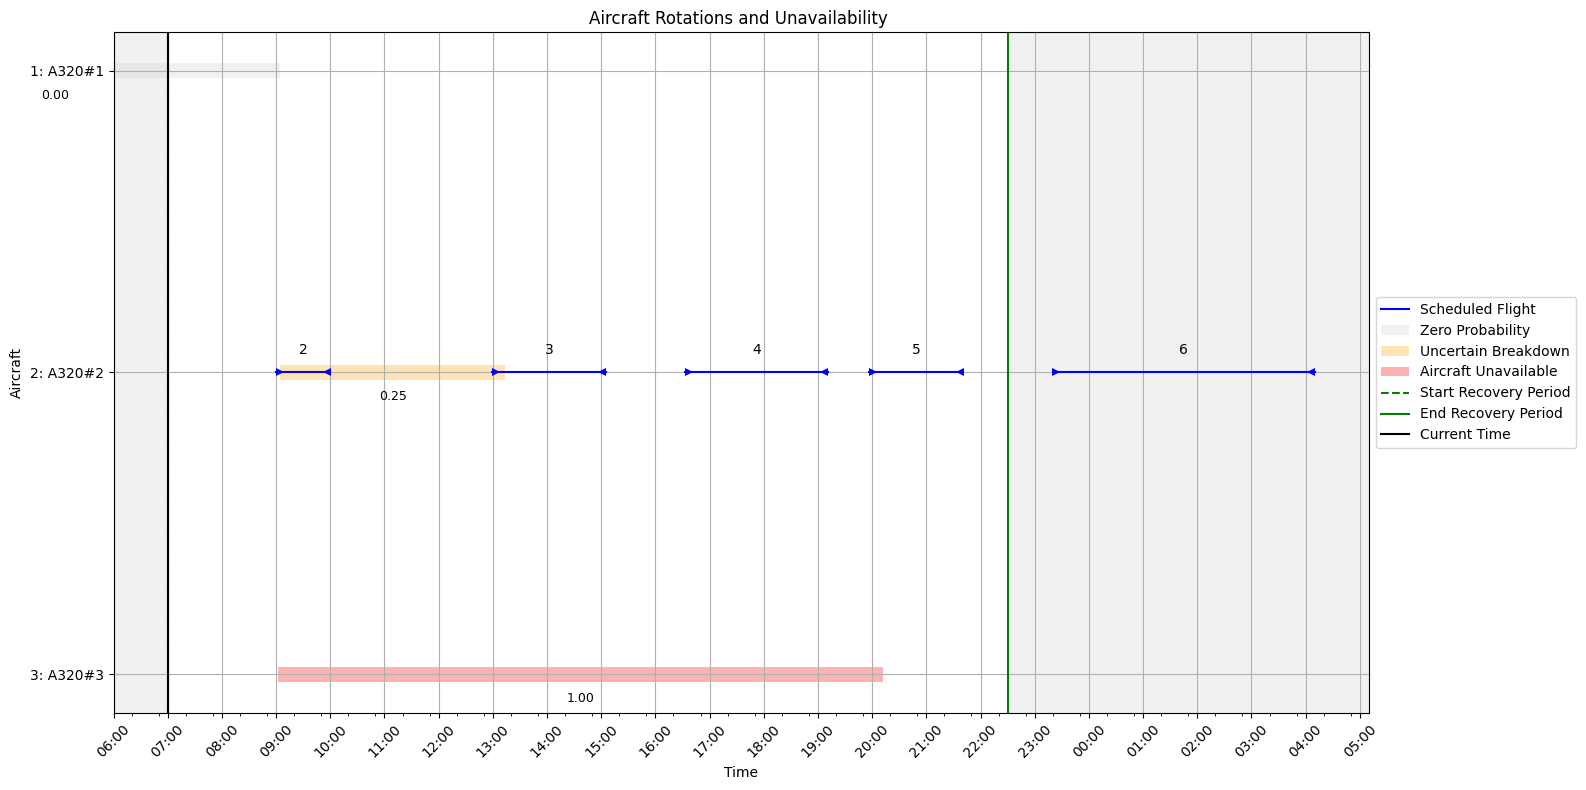

Processing scenario: Scenario_10
{'RecoveryPeriod': {'StartDate': '16/09/24', 'StartTime': '6:00', 'EndDate': '16/09/24', 'EndTime': '21:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_10


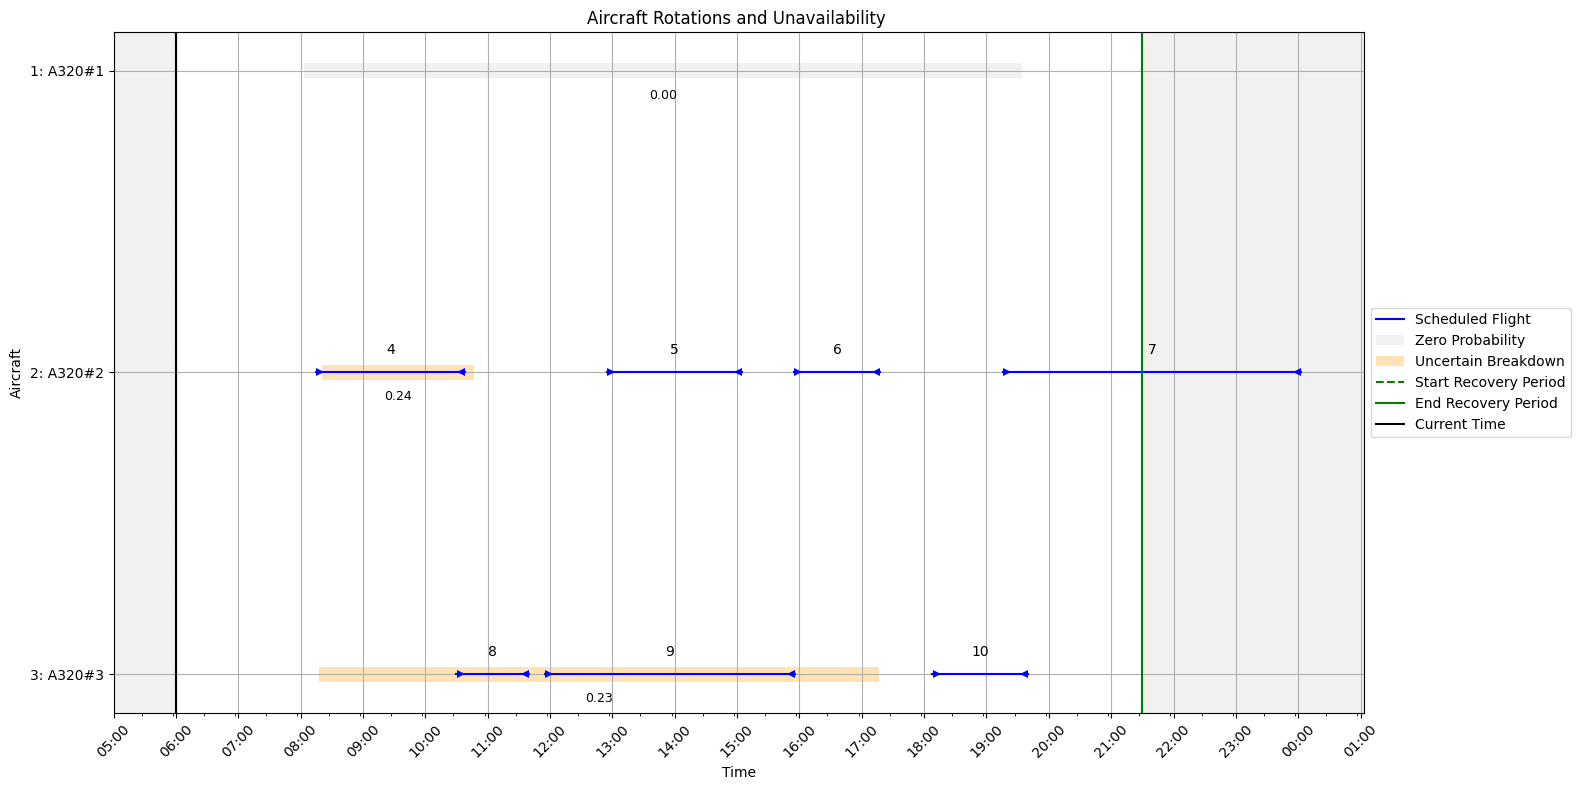

Processing scenario: Scenario_100
{'RecoveryPeriod': {'StartDate': '17/09/24', 'StartTime': '5:00', 'EndDate': '17/09/24', 'EndTime': '22:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_100


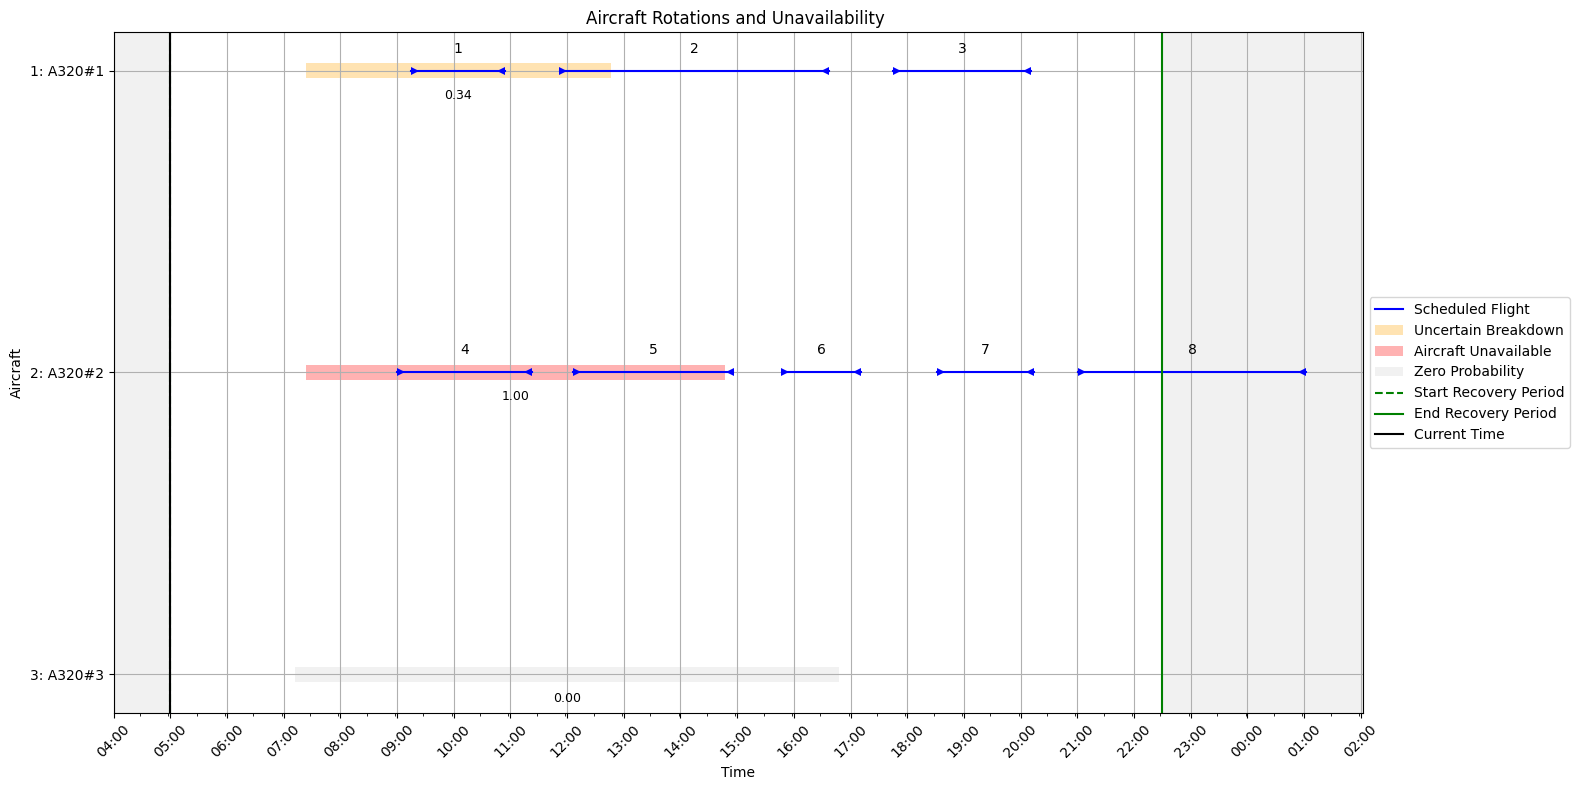

Processing scenario: Scenario_11
{'RecoveryPeriod': {'StartDate': '10/09/24', 'StartTime': '5:00', 'EndDate': '10/09/24', 'EndTime': '21:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_11


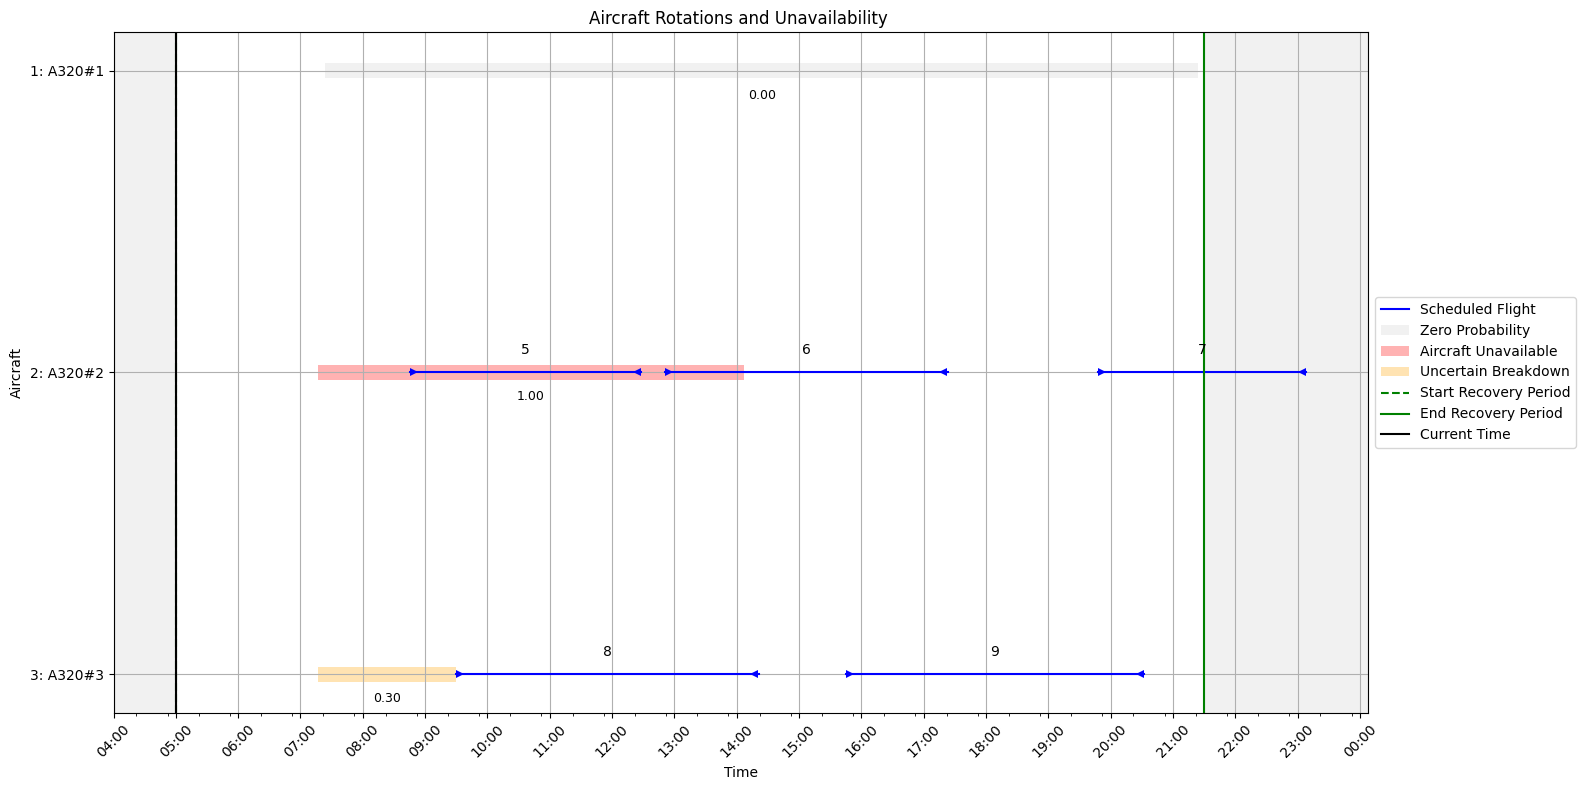

Processing scenario: Scenario_12
{'RecoveryPeriod': {'StartDate': '18/09/24', 'StartTime': '7:00', 'EndDate': '18/09/24', 'EndTime': '21:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_12


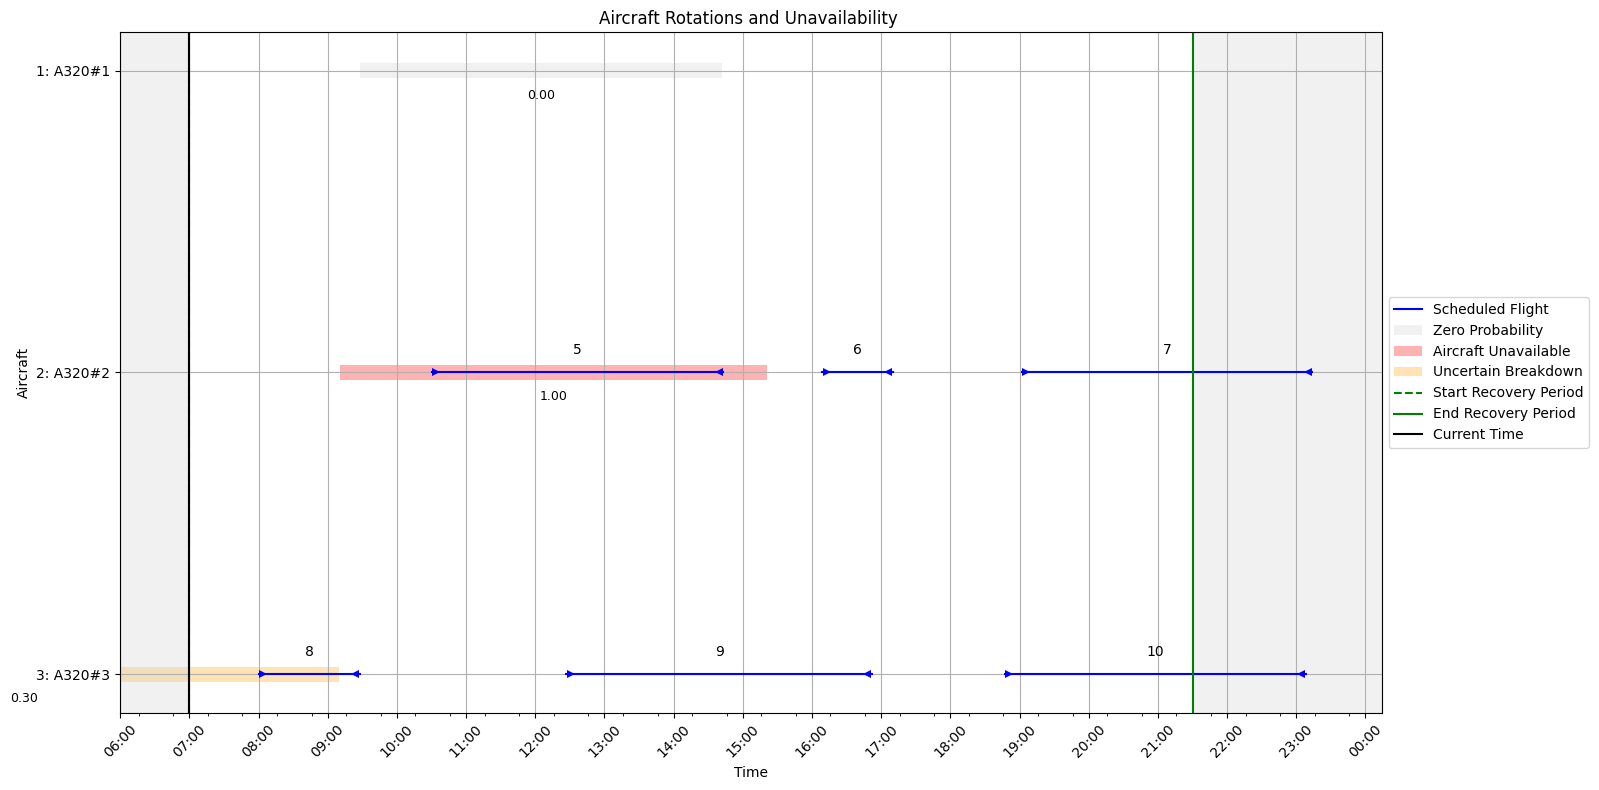

Processing scenario: Scenario_13
{'RecoveryPeriod': {'StartDate': '27/09/24', 'StartTime': '7:00', 'EndDate': '27/09/24', 'EndTime': '23:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_13


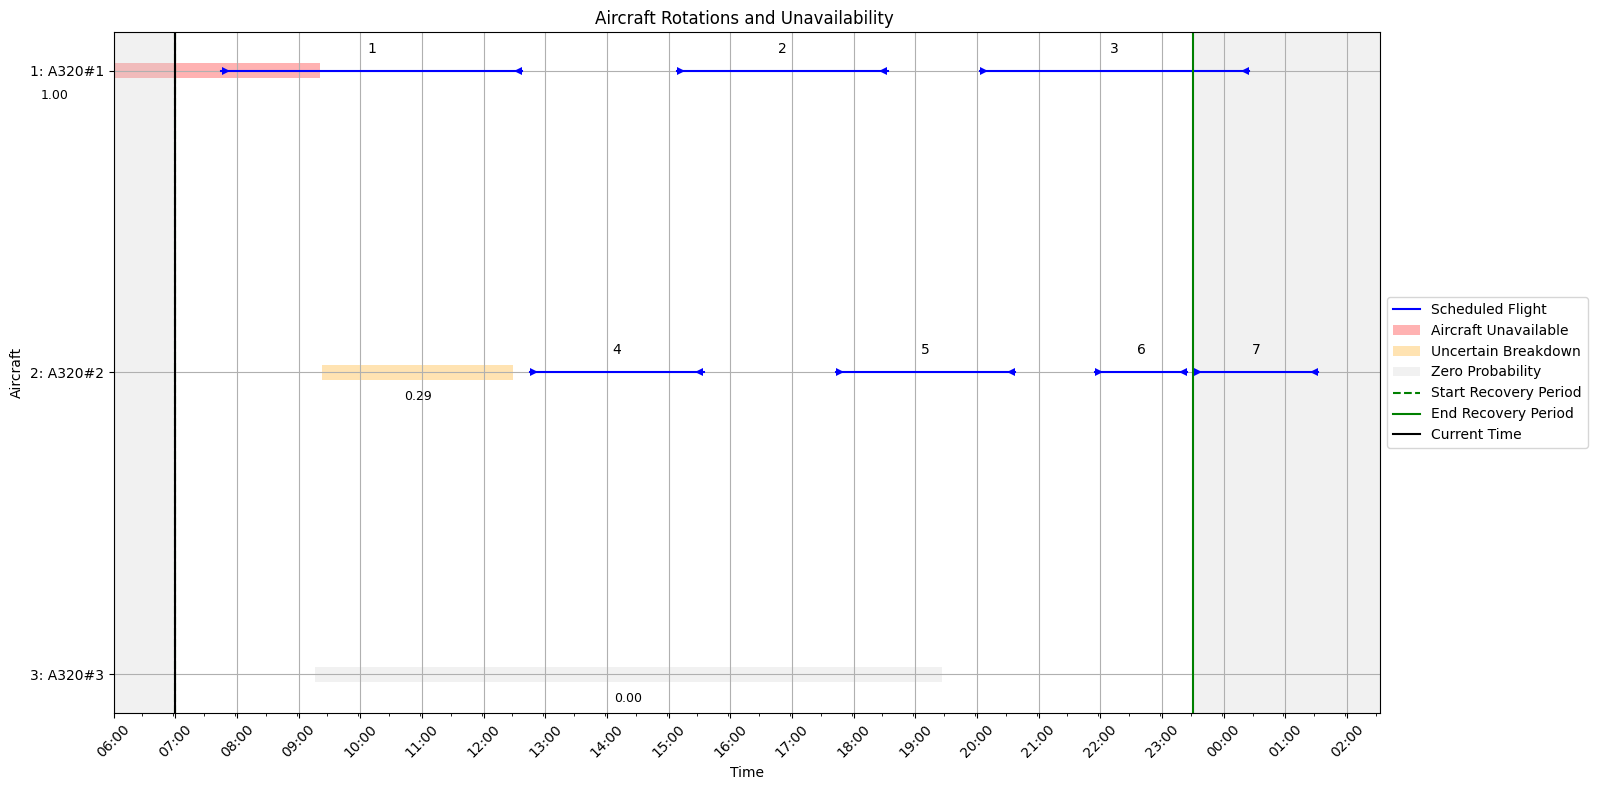

Processing scenario: Scenario_14
{'RecoveryPeriod': {'StartDate': '06/09/24', 'StartTime': '6:00', 'EndDate': '06/09/24', 'EndTime': '22:00'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_14


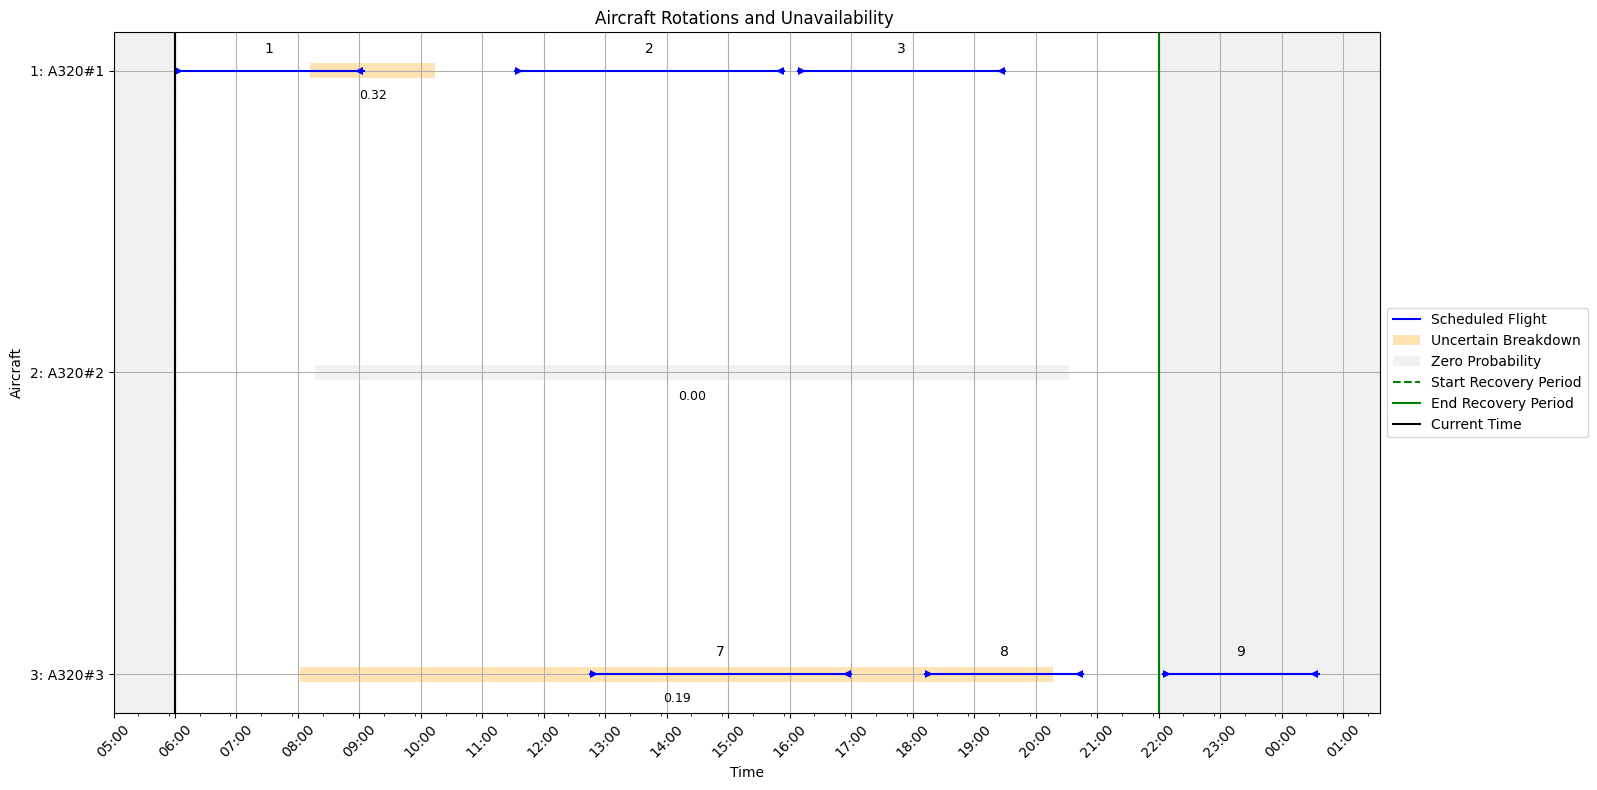

Processing scenario: Scenario_15
{'RecoveryPeriod': {'StartDate': '03/09/24', 'StartTime': '5:00', 'EndDate': '03/09/24', 'EndTime': '21:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_15


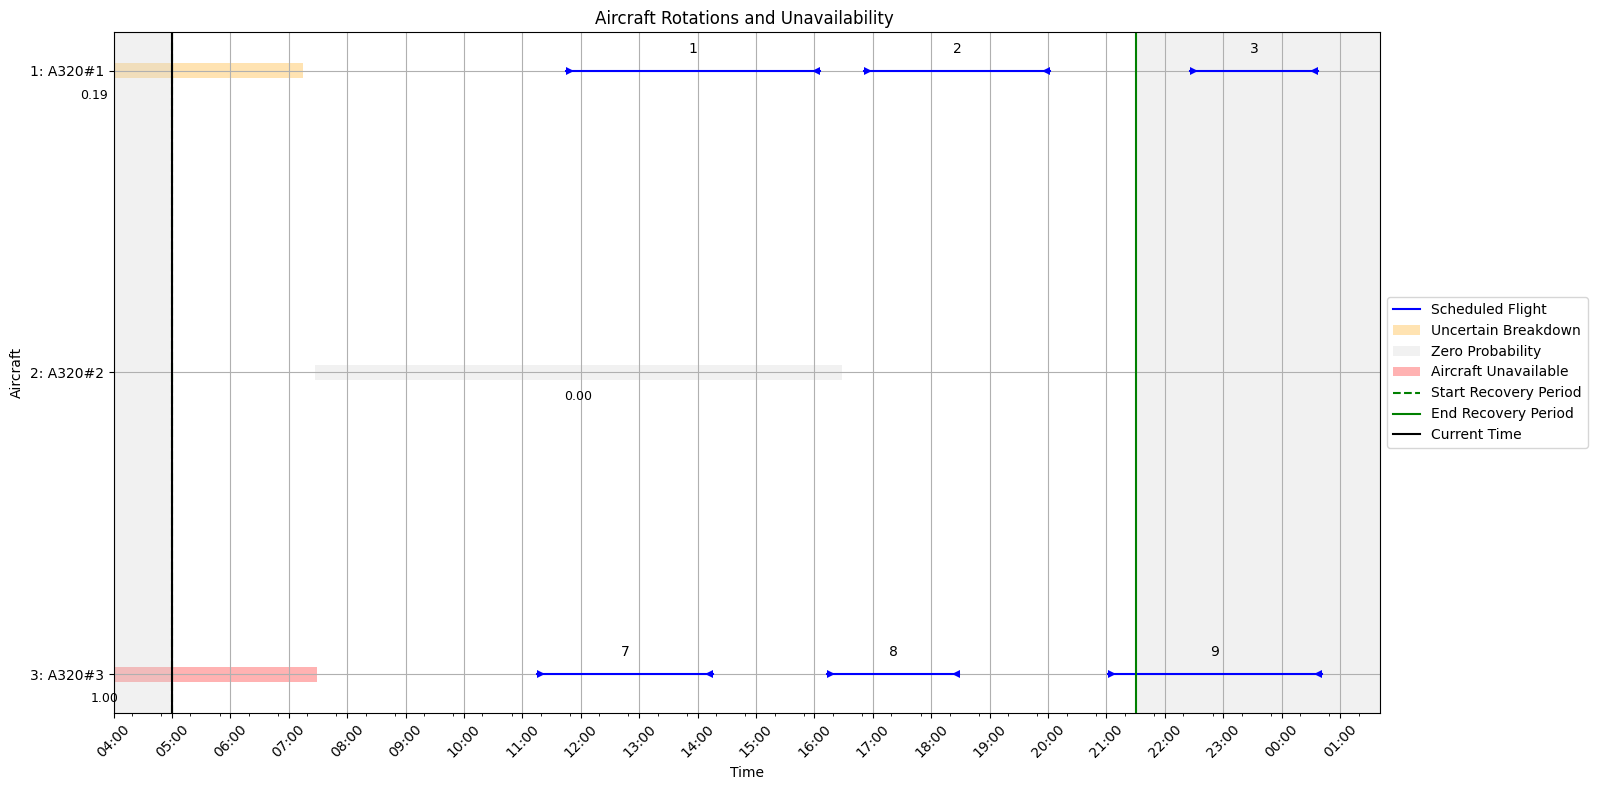

Processing scenario: Scenario_16
{'RecoveryPeriod': {'StartDate': '06/09/24', 'StartTime': '6:00', 'EndDate': '06/09/24', 'EndTime': '21:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_16


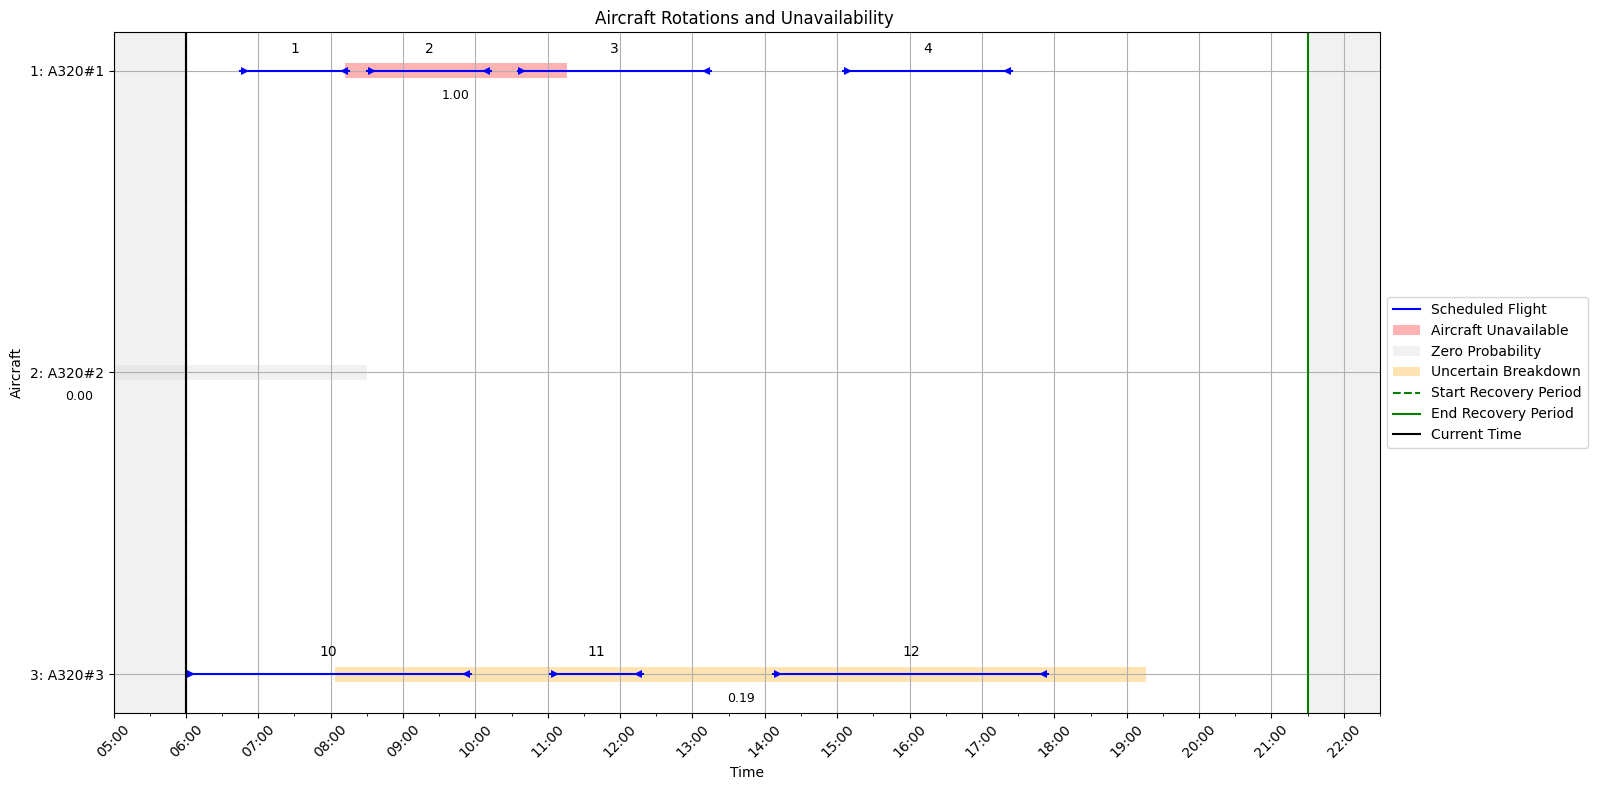

Processing scenario: Scenario_17
{'RecoveryPeriod': {'StartDate': '06/09/24', 'StartTime': '6:00', 'EndDate': '06/09/24', 'EndTime': '22:00'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_17


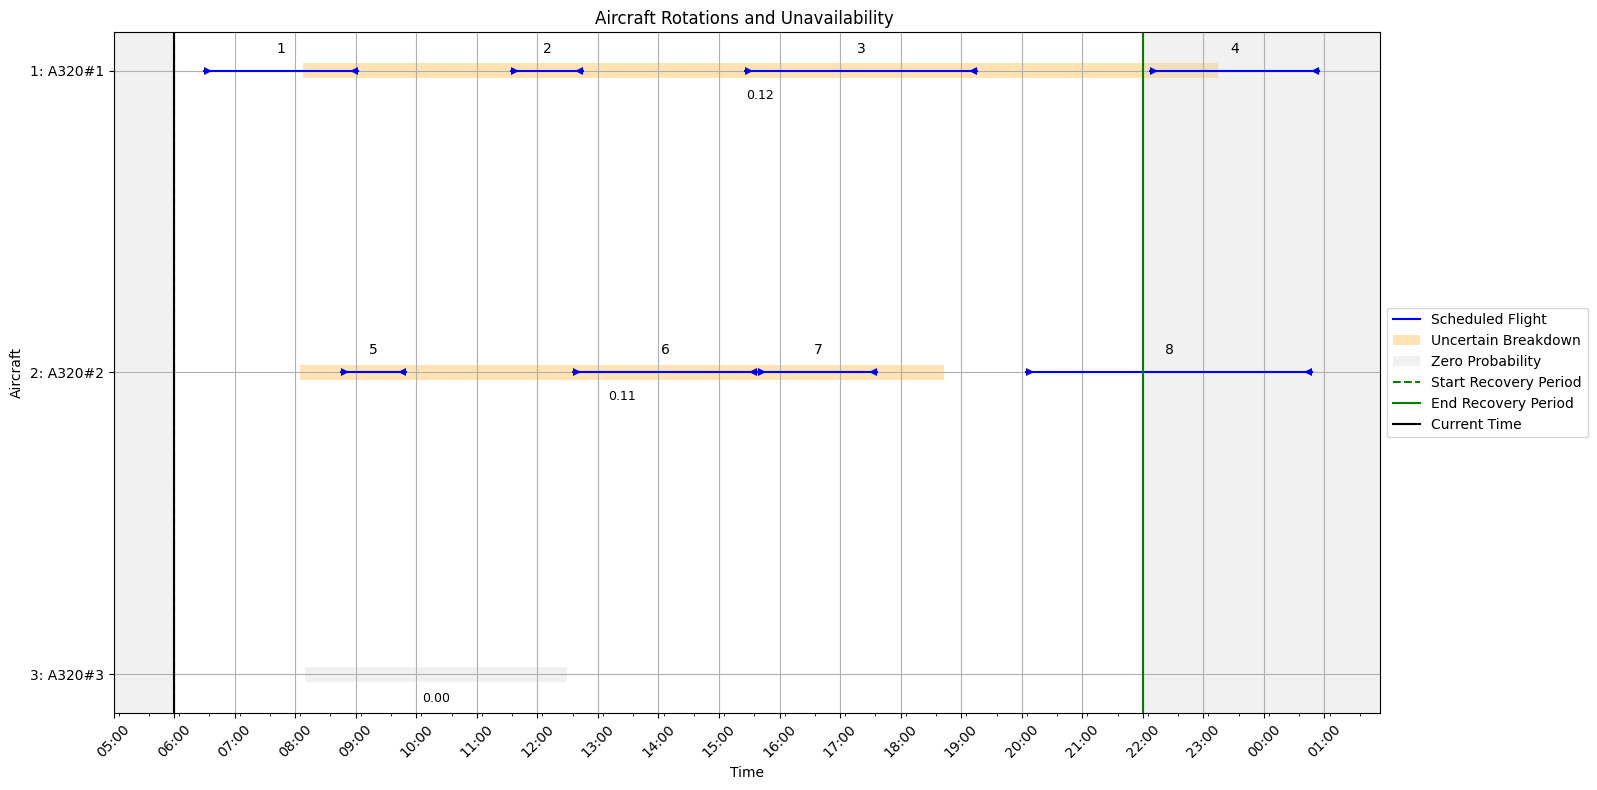

Processing scenario: Scenario_18
{'RecoveryPeriod': {'StartDate': '28/09/24', 'StartTime': '6:00', 'EndDate': '28/09/24', 'EndTime': '20:00'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_18


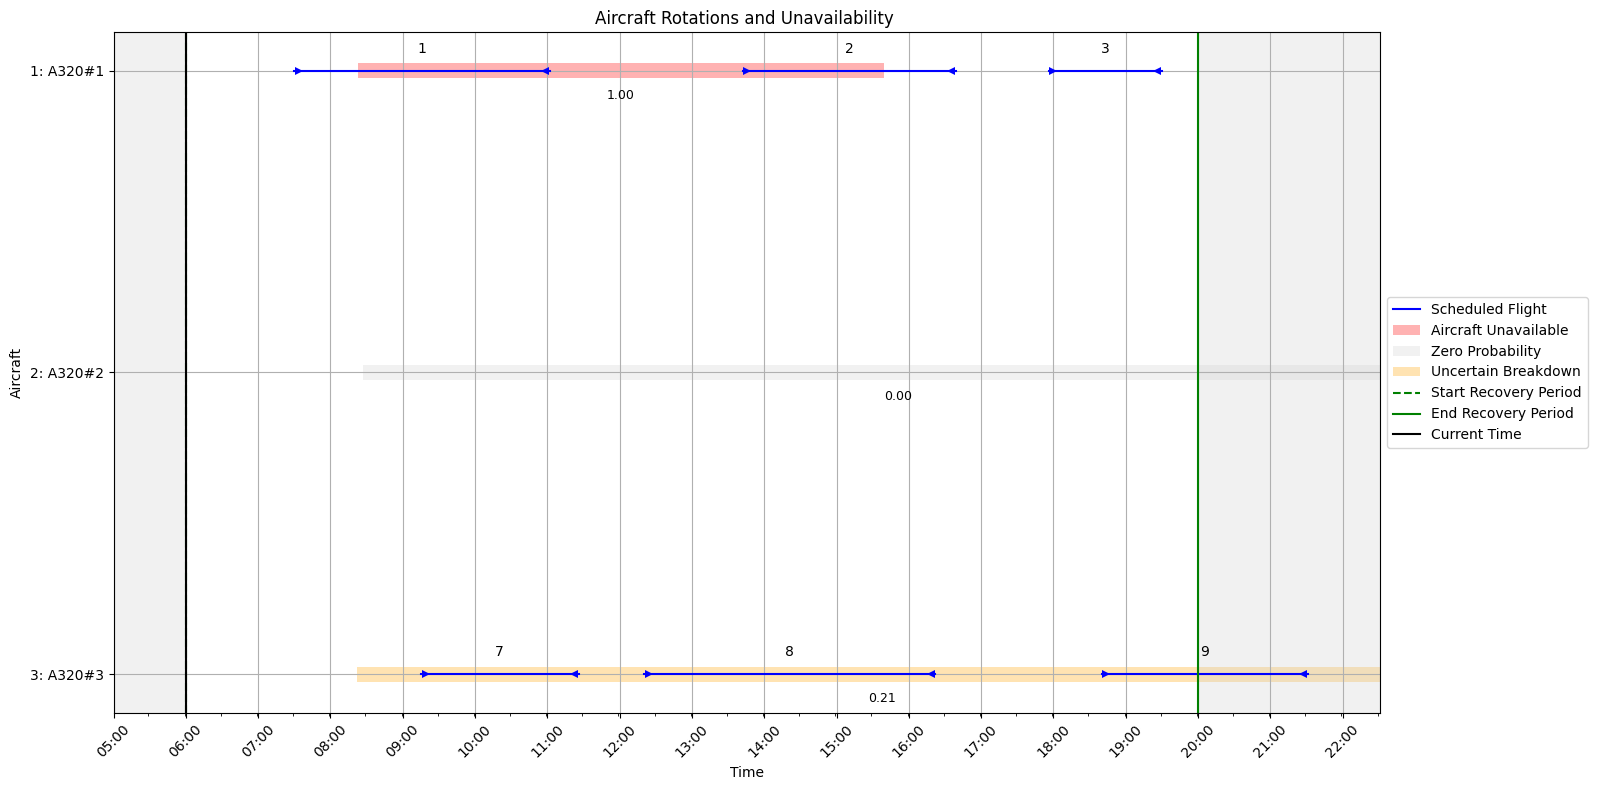

Processing scenario: Scenario_19
{'RecoveryPeriod': {'StartDate': '01/09/24', 'StartTime': '7:00', 'EndDate': '01/09/24', 'EndTime': '20:00'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_19


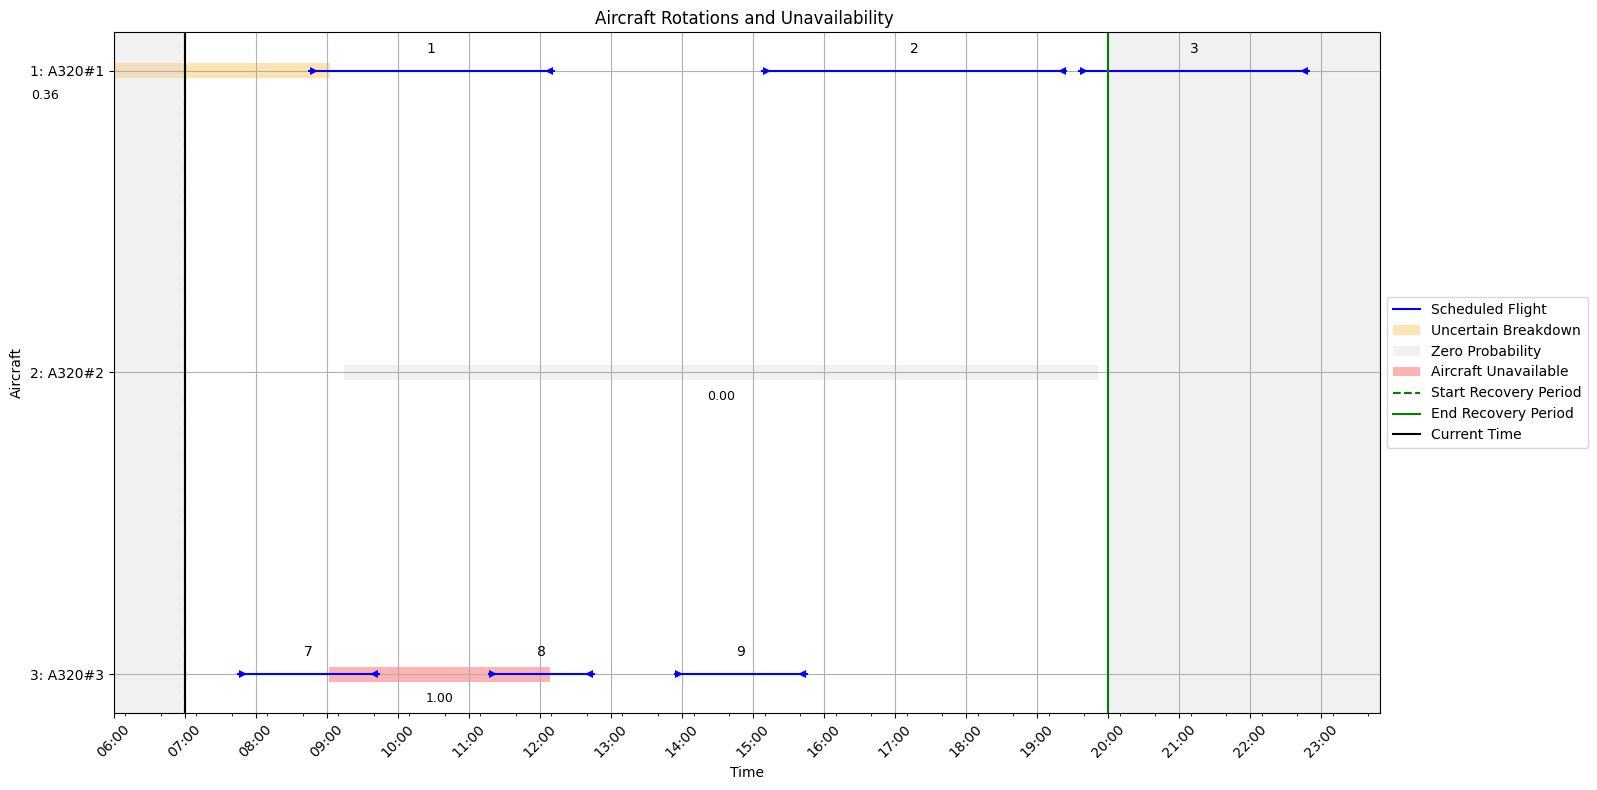

Processing scenario: Scenario_20
{'RecoveryPeriod': {'StartDate': '12/09/24', 'StartTime': '7:00', 'EndDate': '12/09/24', 'EndTime': '21:00'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_20


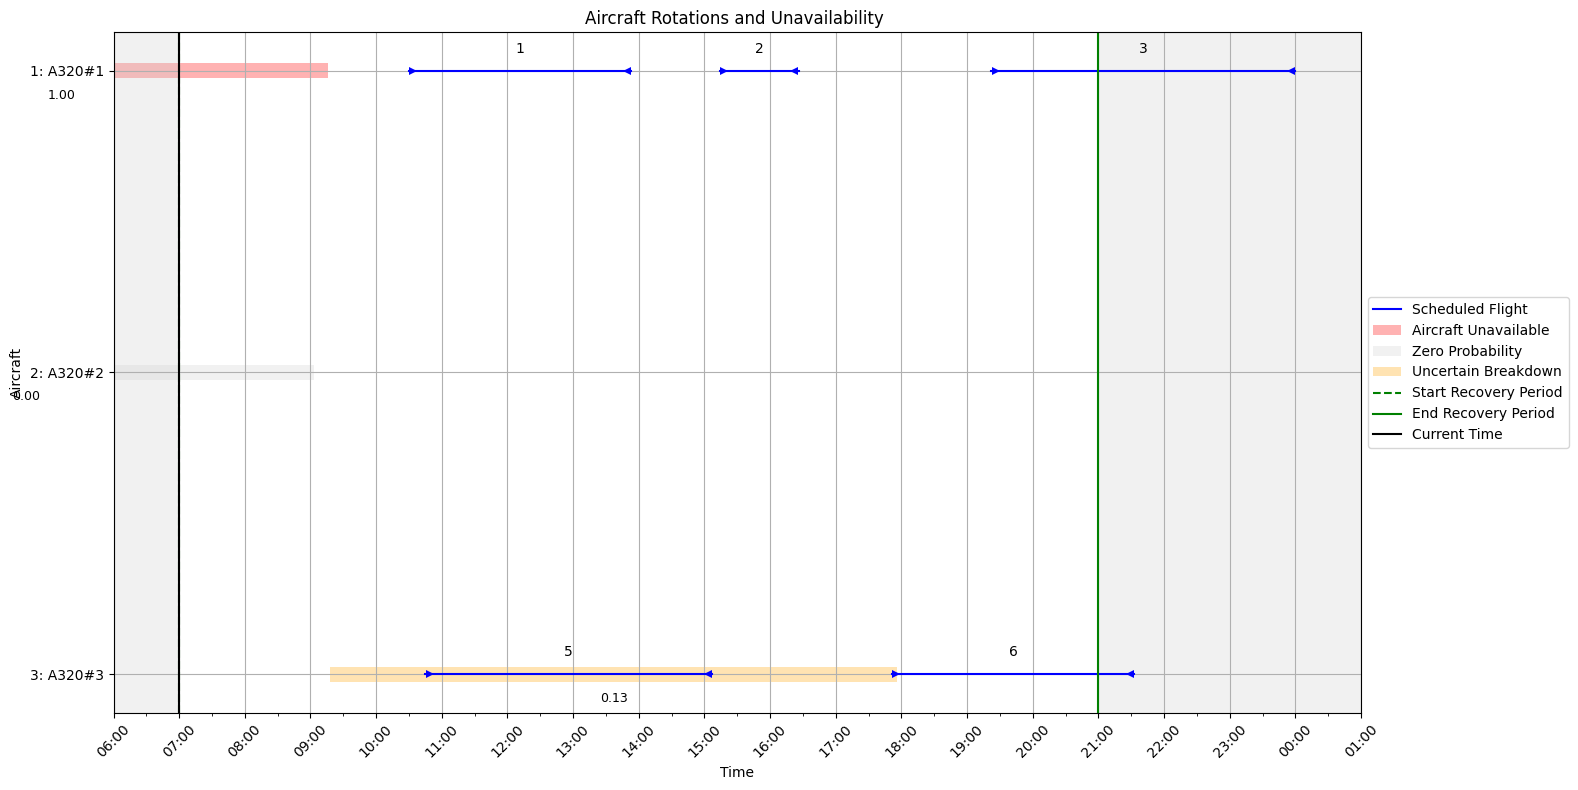

Processing scenario: Scenario_21
{'RecoveryPeriod': {'StartDate': '07/09/24', 'StartTime': '5:00', 'EndDate': '07/09/24', 'EndTime': '20:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_21


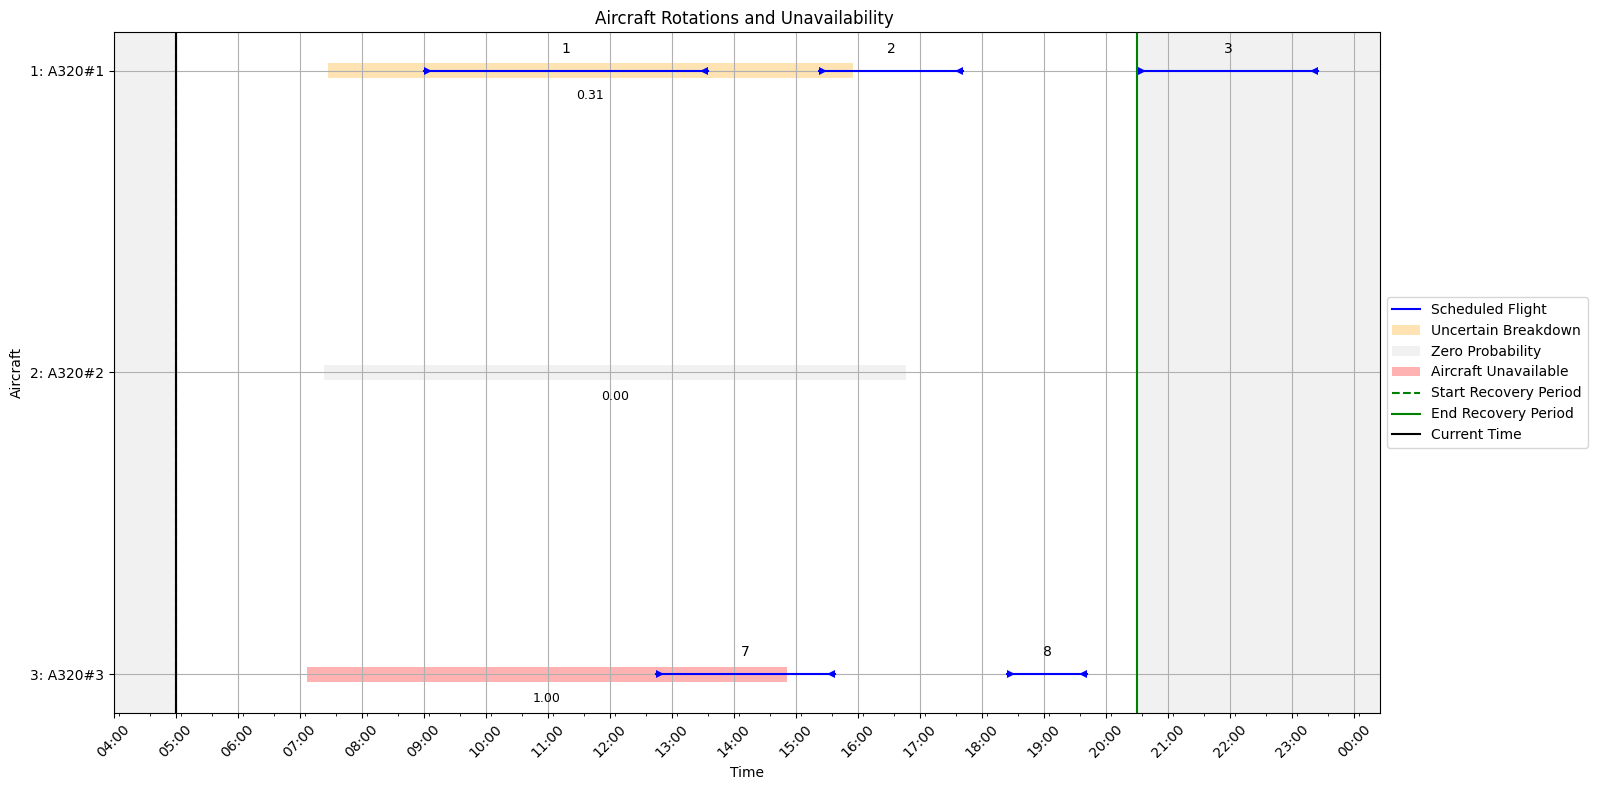

Processing scenario: Scenario_22
{'RecoveryPeriod': {'StartDate': '10/09/24', 'StartTime': '7:00', 'EndDate': '10/09/24', 'EndTime': '22:00'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_22


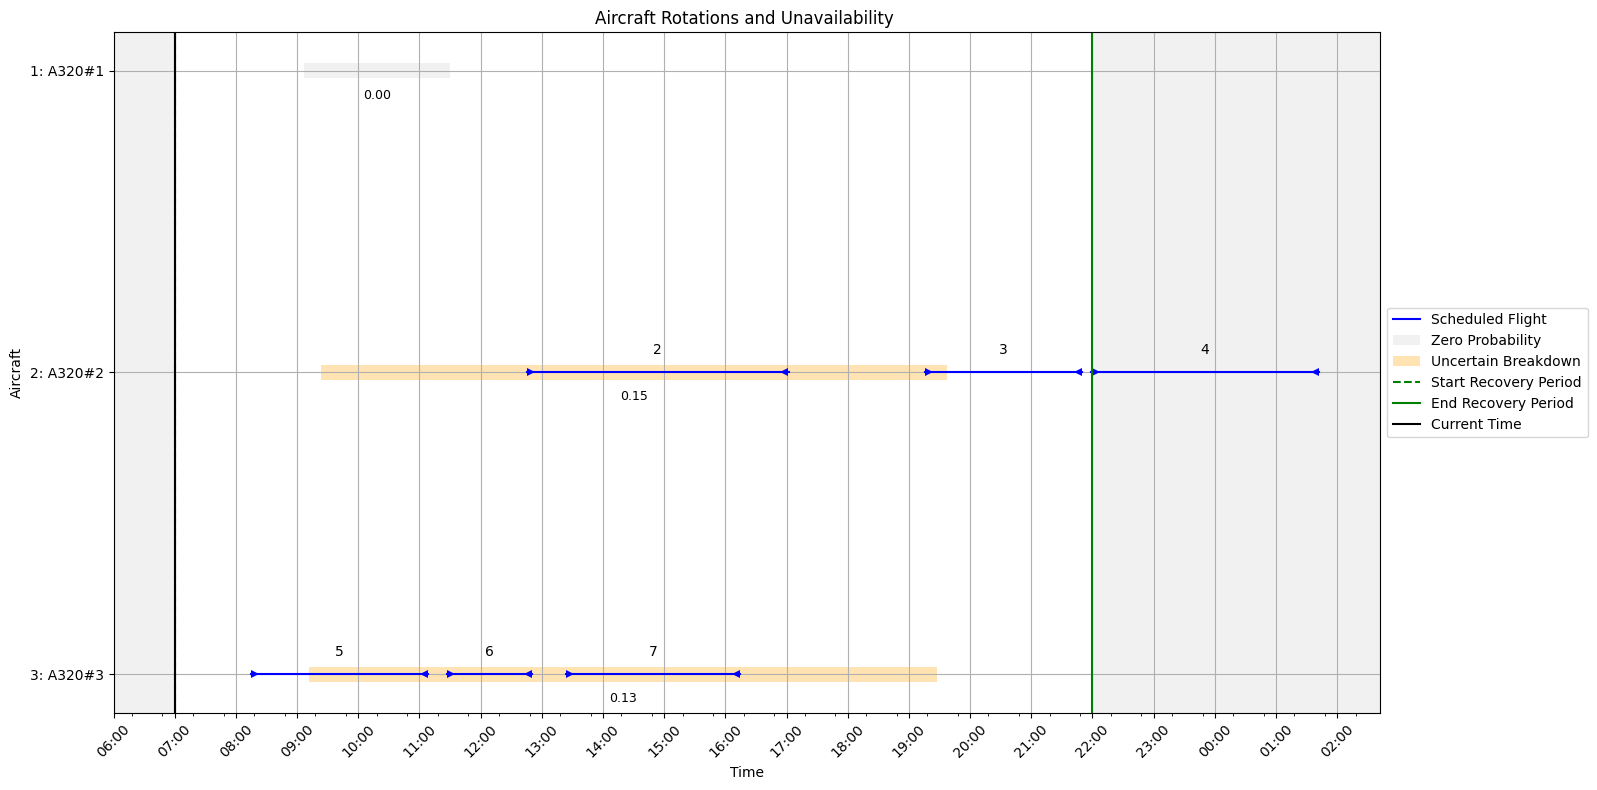

Processing scenario: Scenario_23
{'RecoveryPeriod': {'StartDate': '14/09/24', 'StartTime': '5:00', 'EndDate': '14/09/24', 'EndTime': '20:00'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_23


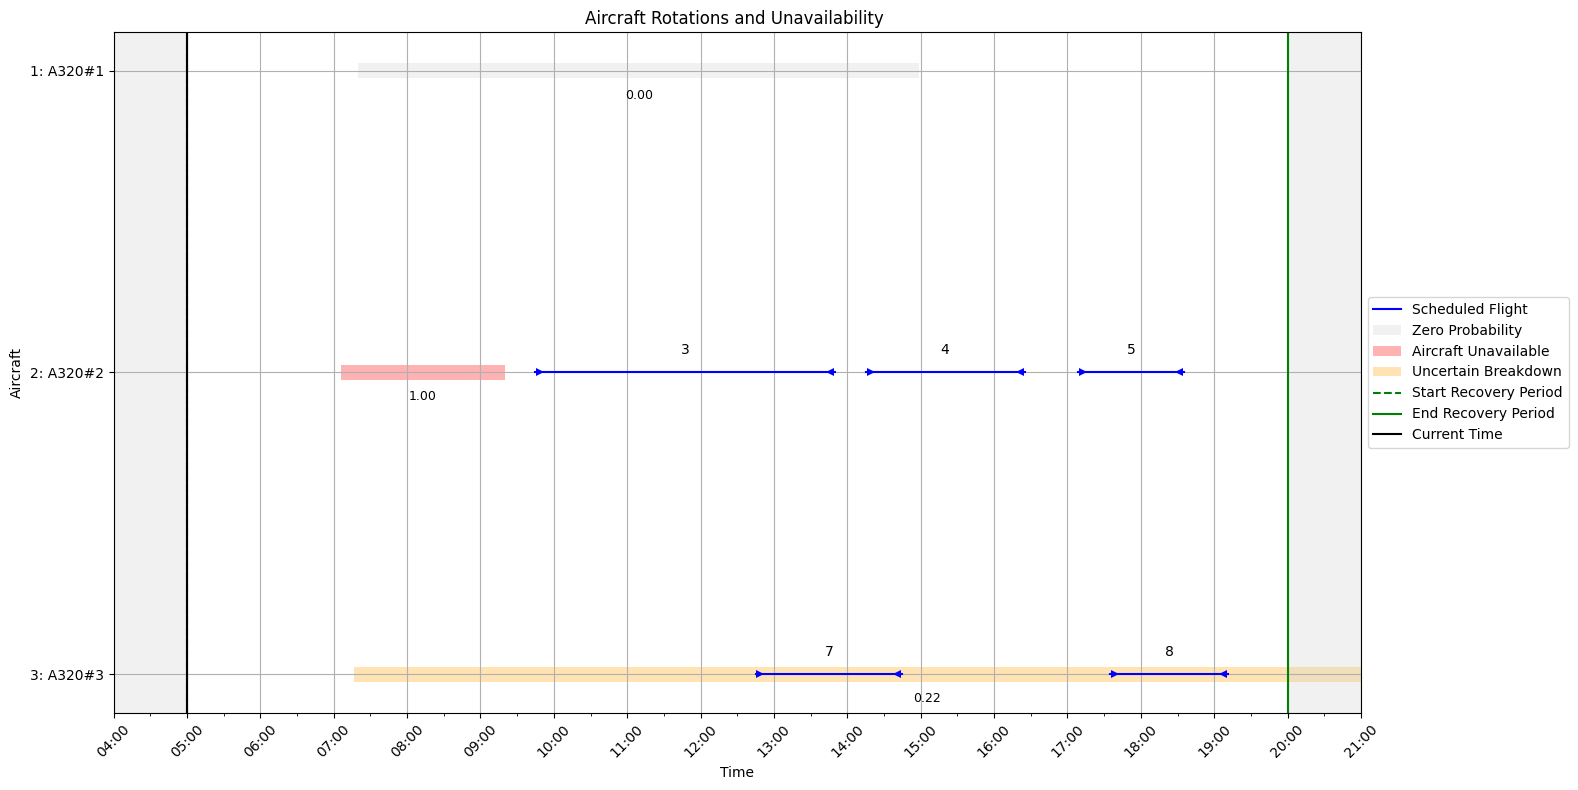

Processing scenario: Scenario_24
{'RecoveryPeriod': {'StartDate': '13/09/24', 'StartTime': '7:00', 'EndDate': '13/09/24', 'EndTime': '22:00'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_24


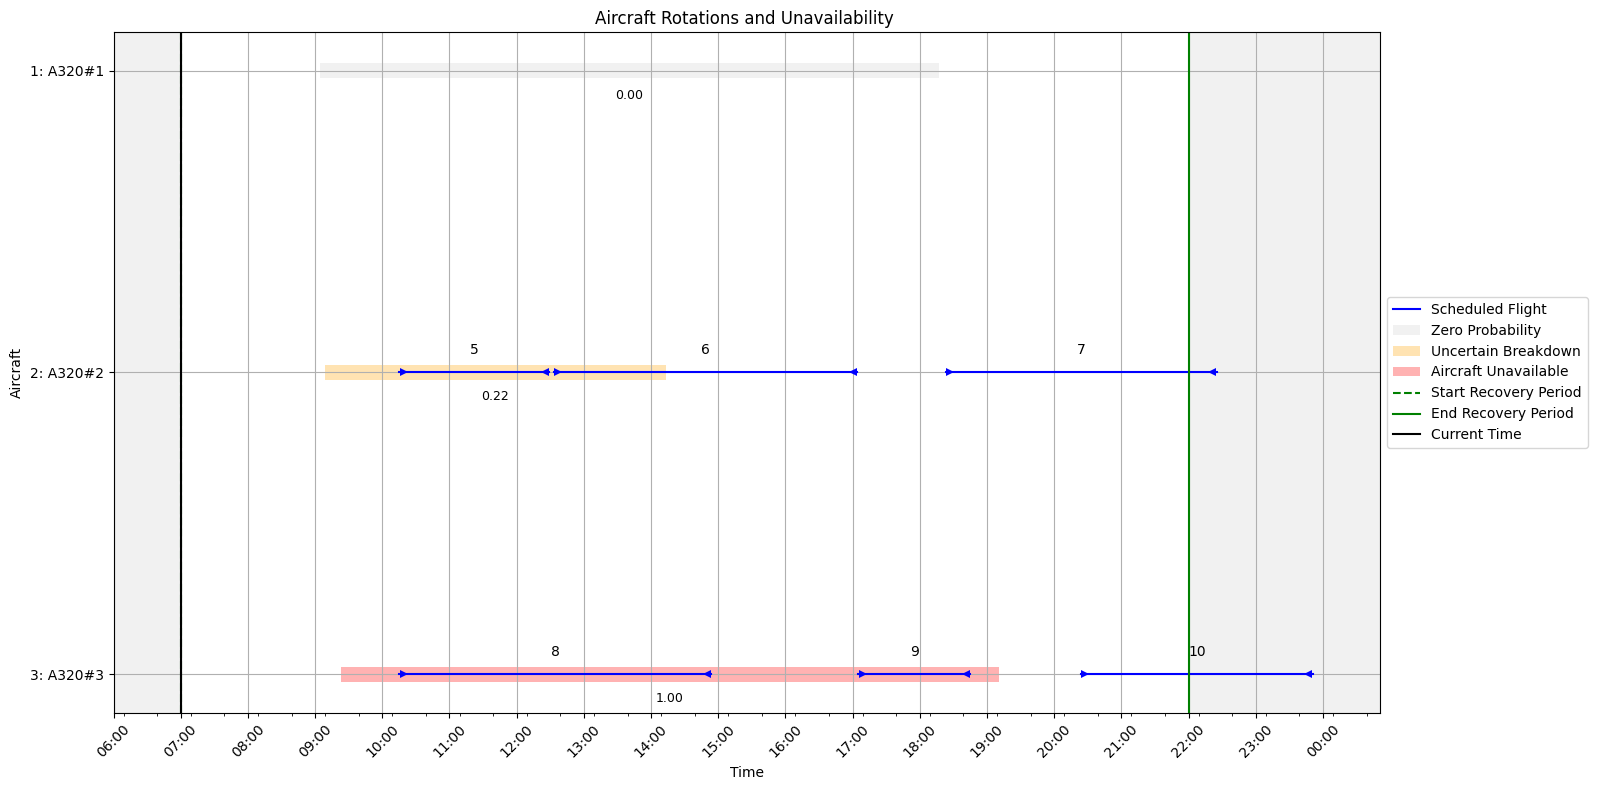

Processing scenario: Scenario_25
{'RecoveryPeriod': {'StartDate': '14/09/24', 'StartTime': '7:00', 'EndDate': '14/09/24', 'EndTime': '21:30'}, 'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}], 'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}], 'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}], 'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}], 'PenaltyCosts': [200.0, 300.0, 400.0], 'Weights': [1.0, 0.5, 0.2]}
Plotting state for scenario: Scenario_25


KeyboardInterrupt: 

In [2]:
from scripts.visualizations import StatePlotter
from scripts.utils import load_scenario_data
import os
from src.environment import AircraftDisruptionEnv
from datetime import datetime

env_type = 'myopic'

# Set the root folder for scenarios
data_root_folder = "../data/Training/100-3ac-cleared/"

# Verify that the root folder exists
if not os.path.exists(data_root_folder):
    raise FileNotFoundError(f"The data root folder does not exist: {data_root_folder}")

# Get the list of scenarios, sorted by name in ascending order
scenarios = sorted(
    [scenario for scenario in os.listdir(data_root_folder) if os.path.isdir(os.path.join(data_root_folder, scenario))]
)

# Process each scenario
for scenario_name in scenarios:
    scenario_path = os.path.join(data_root_folder, scenario_name)
    
    print(f"Processing scenario: {scenario_name}")

    # Verify that the scenario exists
    if not os.path.exists(scenario_path):
        print(f"Scenario {scenario_name} does not exist. Skipping...")
        continue

    # Load scenario data
    data_dict = load_scenario_data(scenario_path)

    # Extract necessary data for the environment
    aircraft_dict = data_dict['aircraft']
    flights_dict = data_dict['flights']
    rotations_dict = data_dict['rotations']
    alt_aircraft_dict = data_dict['alt_aircraft']
    config_dict = data_dict['config']

    # Print configuration details for verification
    print(config_dict)

    # Initialize the environment
    env = AircraftDisruptionEnv(
        aircraft_dict, flights_dict, rotations_dict, alt_aircraft_dict, config_dict, env_type=env_type
    )
    
    # Create StatePlotter object for visualizing the environment state
    state_plotter = StatePlotter(
        aircraft_dict=env.aircraft_dict,
        flights_dict=env.flights_dict,
        rotations_dict=env.rotations_dict,
        alt_aircraft_dict=env.alt_aircraft_dict,
        start_datetime=env.start_datetime,
        end_datetime=env.end_datetime,
        uncertain_breakdowns=env.uncertain_breakdowns,
    )

    # Define the recovery period based on provided configuration
    start_date = config_dict['RecoveryPeriod']['StartDate']
    start_time = config_dict['RecoveryPeriod']['StartTime']
    end_date = config_dict['RecoveryPeriod']['EndDate']
    end_time = config_dict['RecoveryPeriod']['EndTime']
    start_datetime = datetime.strptime(f"{start_date} {start_time}", '%d/%m/%y %H:%M')

    # Plot the state for the current scenario
    print(f"Plotting state for scenario: {scenario_name}")
    state_plotter.plot_state(flights_dict, [], [], set(), env.current_datetime)

print("All scenarios processed successfully.")
